# Casestudy 1: Plasma lipidomics in Alzheimer's disease
(Study about the desies is already done in Version 1)

## 1. Import essential liberaries

In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plasma-lipidomics-in-alzheimers-disease/Plasma lipidomics in Alzheimers disease and its progression-1.csv


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data loading and understanding

In [26]:
alz_data= pd.read_csv('/kaggle/input/plasma-lipidomics-in-alzheimers-disease/Plasma lipidomics in Alzheimers disease and its progression-1.csv', index_col = [0])
# print('Dimesion of dataset',alz_data.shape)
# print('Attributs of dataset',alz_data.columns.values)
alz_data.head()

,Diagnostic,Sex,Age,MMSE,CSF Amyloid (pg/mL),CSF Total tau (pg/mL),CSF Phosphorylated tau (pg/mL),APOE4,Progression to Alzheimer's Disease,Progression time (months)
Sample,,,,,,,,,,
1,Alzheimer's Disease,Female,68,26,688.0,369.0,107.0,Yes,NaN,NaN
2,Alzheimer's Disease,Female,66,22,489.0,482.0,176.0,Yes,NaN,NaN
3,Alzheimer's Disease,Female,72,23,509.0,329.0,114.0,Yes,NaN,NaN
4,Alzheimer's Disease,Male,73,25,544.0,482.0,80.0,No,NaN,NaN
5,Alzheimer's Disease,Female,75,15,303.0,806.0,120.0,No,NaN,NaN


In [27]:
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Diagnostic                          212 non-null    object 
 1   Sex                                 212 non-null    object 
 2   Age                                 212 non-null    int64  
 3   MMSE                                212 non-null    int64  
 4   CSF Amyloid (pg/mL)                 198 non-null    float64
 5   CSF Total tau (pg/mL)               198 non-null    float64
 6   CSF Phosphorylated tau (pg/mL)      198 non-null    float64
 7   APOE4                               209 non-null    object 
 8   Progression to Alzheimer's Disease  89 non-null     object 
 9   Progression time (months)           47 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 18.2+ KB


In [28]:
alz_data.describe()

,Age,MMSE,CSF Amyloid (pg/mL),CSF Total tau (pg/mL),CSF Phosphorylated tau (pg/mL),Progression time (months)
count,212.000000,212.000000,198.000000,198.000000,198.000000,47.000000
mean,73.485849,25.061321,642.904040,464.257576,79.836364,19.936170
std,6.321916,3.013558,381.068117,273.437167,59.701794,12.262357
min,52.000000,15.000000,243.000000,67.100000,15.600000,7.000000
25%,70.000000,23.000000,420.500000,254.750000,48.025000,12.000000
50%,74.000000,25.000000,551.000000,408.500000,68.000000,16.000000
75%,78.000000,27.000000,711.750000,613.750000,92.000000,23.500000
max,85.000000,30.000000,3863.000000,1550.000000,512.000000,55.000000


In [29]:
# coefficient_of_variation  # just a test
coefficient_of_variation = (alz_data["Age"].std()/ alz_data["Age"].mean()) * 100
print(f"Coefficient of Variation On Age: {coefficient_of_variation} %")

Coefficient of Variation On Age: 8.602902739210363 %


## 3. Cleaning the Dataset
- Removing useless columns

In [30]:
# reading info() we can see that there is no use of taking Progression to Alzheimer's Disease",
# "Progression time (months) since there is no enough data
# so we delete those columns
alz_data.drop(columns = ["Progression to Alzheimer's Disease","Progression time (months)"],inplace=True)
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Diagnostic                      212 non-null    object 
 1   Sex                             212 non-null    object 
 2   Age                             212 non-null    int64  
 3   MMSE                            212 non-null    int64  
 4   CSF Amyloid (pg/mL)             198 non-null    float64
 5   CSF Total tau (pg/mL)           198 non-null    float64
 6   CSF Phosphorylated tau (pg/mL)  198 non-null    float64
 7   APOE4                           209 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB


In [31]:
# Tsi is done just to remove duplicates from the datase
alz_data.drop_duplicates(inplace = True)
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Diagnostic                      212 non-null    object 
 1   Sex                             212 non-null    object 
 2   Age                             212 non-null    int64  
 3   MMSE                            212 non-null    int64  
 4   CSF Amyloid (pg/mL)             198 non-null    float64
 5   CSF Total tau (pg/mL)           198 non-null    float64
 6   CSF Phosphorylated tau (pg/mL)  198 non-null    float64
 7   APOE4                           209 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB


we found there is no duplicates in the dataset

## Renaming the comumns  just for an ease

In [32]:
alz_data.rename(columns= {"CSF Amyloid (pg/mL)": "CSF Amyloid","CSF Total tau (pg/mL)":"CSF Total tau","CSF Phosphorylated tau (pg/mL)":"CSF Phosphorylated tau"}, inplace = True)
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    object 
 1   Sex                     212 non-null    object 
 2   Age                     212 non-null    int64  
 3   MMSE                    212 non-null    int64  
 4   CSF Amyloid             198 non-null    float64
 5   CSF Total tau           198 non-null    float64
 6   CSF Phosphorylated tau  198 non-null    float64
 7   APOE4                   209 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB


# 3.1. Handling Missing Values
 - We can see from the info that there are a lot of missing values in the colums CSF Amyloid, CSF Total tau, and CSF Phosphorylated tau

In [33]:
# finding the total number of missing values in each column
alz_data.isnull().sum()

Diagnostic                 0
Sex                        0
Age                        0
MMSE                       0
CSF Amyloid               14
CSF Total tau             14
CSF Phosphorylated tau    14
APOE4                      3
dtype: int64

### missing valies in the dataset
- CSF Amyloid               14
- CSF Total tau             14
- CSF Phosphorylated tau    14
- APOE4                      3


### Lets check the unique values in the columns

In [34]:
alz_data['CSF Amyloid'].unique()

array([ 688.,  489.,  509.,  544.,  303.,  520.,  243.,   nan,  571.,
        564.,  496.,  451.,  450.,  429.,  297.,  430.,  735.,  272.,
        400.,  285.,  583.,  584.,  464.,  692.,  586.,  605.,  345.,
        408.,  699.,  501.,  493., 1758.,  628.,  637.,  684.,  711.,
        555.,  328.,  289.,  401.,  249.,  344.,  532.,  271.,  432.,
        479.,  562.,  431.,  484.,  306.,  363., 1213.,  417.,  519.,
        635.,  595.,  481.,  337.,  556.,  393.,  365.,  597.,  678.,
        362.,  269.,  419.,  483.,  610.,  497.,  550.,  420.,  609.,
        405.,  338.,  864.,  398.,  642.,  339.,  552.,  566.,  693.,
        512.,  578.,  395.,  354.,  755.,  402., 1845.,  928.,  619.,
        784.,  670., 1592.,  435.,  872.,  392.,  374.,  655.,  478.,
        929.,  582.,  958.,  270., 1070.,  257.,  798., 1175.,  327.,
        528.,  413.,  627.,  308.,  290.,  485., 1006., 1005., 1060.,
        874.,  513.,  390.,  879.,  369.,  647.,  704.,  634., 1135.,
        833.,  422.,

In [35]:
# Finding the range
alz_data['CSF Amyloid'].max() - alz_data['CSF Amyloid'].min()

3620.0

In [36]:
alz_data['CSF Amyloid'].mean()

642.9040404040404

In [37]:
alz_data['CSF Amyloid'].fillna(alz_data['CSF Amyloid'].mean(), inplace = True) 

/tmp/ipykernel_33/3832197995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alz_data['CSF Amyloid'].fillna(alz_data['CSF Amyloid'].mean(), inplace = True)


In [38]:
alz_data['CSF Amyloid'].unique()

array([ 688.       ,  489.       ,  509.       ,  544.       ,
        303.       ,  520.       ,  243.       ,  642.9040404,
        571.       ,  564.       ,  496.       ,  451.       ,
        450.       ,  429.       ,  297.       ,  430.       ,
        735.       ,  272.       ,  400.       ,  285.       ,
        583.       ,  584.       ,  464.       ,  692.       ,
        586.       ,  605.       ,  345.       ,  408.       ,
        699.       ,  501.       ,  493.       , 1758.       ,
        628.       ,  637.       ,  684.       ,  711.       ,
        555.       ,  328.       ,  289.       ,  401.       ,
        249.       ,  344.       ,  532.       ,  271.       ,
        432.       ,  479.       ,  562.       ,  431.       ,
        484.       ,  306.       ,  363.       , 1213.       ,
        417.       ,  519.       ,  635.       ,  595.       ,
        481.       ,  337.       ,  556.       ,  393.       ,
        365.       ,  597.       ,  678.       ,  362. 

In [39]:
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    object 
 1   Sex                     212 non-null    object 
 2   Age                     212 non-null    int64  
 3   MMSE                    212 non-null    int64  
 4   CSF Amyloid             212 non-null    float64
 5   CSF Total tau           198 non-null    float64
 6   CSF Phosphorylated tau  198 non-null    float64
 7   APOE4                   209 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB


In [40]:
alz_data['CSF Total tau'].unique()


array([ 369. ,  482. ,  329. ,  806. ,  501. ,  686. ,    nan,  620. ,
       1109. ,  559. ,  566. ,  327. ,  333. , 1550. ,  433. ,  575. ,
        949. , 1022. ,  229. ,  494. ,  218. ,  153. ,  429. ,  474. ,
        397. ,  463. ,  891. ,  391. ,  568. ,  480. ,  464. ,  705. ,
        439. ,  484. ,  449. ,  591. ,  538. ,  422. ,  210. ,  478. ,
        412. ,  282. ,  357. ,  576. ,  850. , 1225. ,  248. ,  199. ,
        860. ,  706. ,  371. ,  239. ,  270. ,  627. ,  465. ,  728. ,
        636. ,  674. , 1024. ,  971. ,  264. ,  374. ,  618. ,  360. ,
        291. , 1042. ,  727. ,  889. ,  942. ,  803. ,  601. ,  681. ,
        509. ,  707. ,  551. ,  331. ,  314. ,  619. ,  101. ,  729. ,
       1246. ,  317. ,  739. ,  137. ,  377. ,  257. ,  312. ,  685. ,
        353. ,  531. ,  477. , 1231. ,  296. ,  215. ,  292. , 1047. ,
        195. ,  522. ,  807. ,  713. ,  778. ,  216. ,  334. ,  563. ,
        165. ,  279. ,  265. ,  791. ,  542. ,  440. ,  633. , 1284. ,
      

In [41]:
# Finding range
alz_data['CSF Total tau'].max() - alz_data['CSF Total tau'].min()

1482.9

In [42]:
alz_data['CSF Total tau'].mean()

464.25757575757575

In [43]:
alz_data['CSF Total tau'].fillna(alz_data['CSF Total tau'].mean(), inplace = True) 

/tmp/ipykernel_33/1459980522.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alz_data['CSF Total tau'].fillna(alz_data['CSF Total tau'].mean(), inplace = True)


In [44]:
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    object 
 1   Sex                     212 non-null    object 
 2   Age                     212 non-null    int64  
 3   MMSE                    212 non-null    int64  
 4   CSF Amyloid             212 non-null    float64
 5   CSF Total tau           212 non-null    float64
 6   CSF Phosphorylated tau  198 non-null    float64
 7   APOE4                   209 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB


In [45]:
alz_data['CSF Phosphorylated tau'].unique()

array([107. , 176. , 114. ,  80. , 120. ,  67. ,  94. ,   nan,  96. ,
       128. ,  81. ,  79. ,  54. ,  52. , 158. ,  93. ,  91. , 115. ,
       117. ,  38. ,  72. ,  50. ,  37. ,  78. , 202. ,  63. ,  74. ,
        92. ,  71. ,  73. ,  88. ,  66. ,  69. ,  90. ,  82. ,  68. ,
        39. ,  64. ,  87. , 133. ,  56. , 199. ,  95. ,  47. ,  41. ,
        75. , 136. ,  65. ,  43. , 143. ,  48. , 483. , 118. , 121. ,
        98. , 106. ,  53. ,  58. ,  97. ,  28. , 103. , 146. ,  27.1,
        54.8,  48.1,  53.8,  86.3,  49. ,  92.4, 142. , 394. ,  89.7,
        56.1,  79.8, 127. ,  43.6,  58.2,  67.7, 113. ,  98.3,  55.7,
        85.3,  33.8,  50.9,  88.6,  46.4,  65.3,  75.7,  65.6, 150. ,
        40.7,  60.8,  70.5, 105. ,  88.8,  78.1,  69.4,  34.6, 512. ,
        38.1,  41.3,  58.6,  37.9,  56.6,  63.9,  39.7,  63.2,  51.5,
       124. ,  39.6,  77. ,  50.6,  69.7,  64.4,  78.8,  97.3,  62.3,
        41.5,  45.3,  64.8,  68.4,  46.1,  32.3,  37.1, 119. ,  33.3,
        44.7,  87.1,

In [46]:
# Finding range
alz_data['CSF Phosphorylated tau'].max() - alz_data['CSF Phosphorylated tau'].min()

496.4

In [47]:
alz_data['CSF Phosphorylated tau'].mean()

79.83636363636364

In [48]:
alz_data['CSF Phosphorylated tau'].fillna(alz_data['CSF Phosphorylated tau'].mean(), inplace = True) 

/tmp/ipykernel_33/1953772434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  alz_data['CSF Phosphorylated tau'].fillna(alz_data['CSF Phosphorylated tau'].mean(), inplace = True)


In [49]:
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    object 
 1   Sex                     212 non-null    object 
 2   Age                     212 non-null    int64  
 3   MMSE                    212 non-null    int64  
 4   CSF Amyloid             212 non-null    float64
 5   CSF Total tau           212 non-null    float64
 6   CSF Phosphorylated tau  212 non-null    float64
 7   APOE4                   209 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    object 
 1   Sex                     212 non-null    objec

In [50]:
alz_data['APOE4'].unique()

array(['Yes', 'No', nan], dtype=object)

### APOE4 is a catogorical data inorder to handil the missing value in this we need to chance to to numerical values
- now lets change all the catagorical value to numerical  to do that lets find all the colums that has catagoriacl values
- Diagnostic, Sex, APOE4 columns are catogarical data

In [51]:
alz_data['Diagnostic'].unique()

array(["Alzheimer's Disease", 'Mild Cognitive Impairment', 'Control'],
      dtype=object)

In [52]:
alz_data['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [53]:
alz_data['APOE4'].unique()

array(['Yes', 'No', nan], dtype=object)

### Counting the number of cata items in the column

In [54]:
alz_data['Diagnostic'].value_counts()

Diagnostic
Alzheimer's Disease          103
Mild Cognitive Impairment     89
Control                       20
Name: count, dtype: int64

In [55]:
alz_data['Sex'].value_counts()

Sex
Female    116
Male       96
Name: count, dtype: int64

In [56]:
alz_data['APOE4'].value_counts()

APOE4
No     114
Yes     95
Name: count, dtype: int64

### Inorde to find out the number of femails and males whho has Alzheimer's Disease, Mild Cognitive Impairment, or Control we need to group it sae for APOE4

In [57]:
# Grouping the Diagnostic column 
diagnostic_group = alz_data.groupby(by = 'Diagnostic')
diagnostic_group

In [58]:
alzheimers_disease = diagnostic_group.get_group("Alzheimer's Disease")

In [59]:
alzheimers_disease.Sex.value_counts()

Sex
Female    61
Male      42
Name: count, dtype: int64

In [60]:
alzheimers_disease.APOE4.value_counts()

APOE4
Yes    55
No     48
Name: count, dtype: int64

In [61]:
mci = diagnostic_group.get_group('Mild Cognitive Impairment')
# Control

In [62]:
mci.Sex.value_counts()

Sex
Female    45
Male      44
Name: count, dtype: int64

In [63]:
mci.APOE4.value_counts()

APOE4
No     49
Yes    38
Name: count, dtype: int64

In [64]:
control = diagnostic_group.get_group('Control')

In [65]:
control.Sex.value_counts()

Sex
Female    10
Male      10
Name: count, dtype: int64

In [66]:
control.APOE4.value_counts()

APOE4
No     17
Yes     2
Name: count, dtype: int64

## Why I am setting APOE4 to **'No'** if it is *controlled*, and *Alzheimer's Disease* and **'Yes'** to *Mild Cognitive Impairment*

The reason behind setting the APOE4 column to 'No' for Control and Alzheimer's Disease diagnostics and to 'Yes' for Mild Cognitive Impairment (MCI) is likely based on domain-specific knowledge or assumptions about the relationship between these conditions and the presence of the APOE4 allele.

**Understanding APOE4**

The APOE gene has three common variants (alleles): APOE2, APOE3, and APOE4. **The APOE4 variant is associated with an increased risk of developing Alzheimer's Disease**. However, not all individuals with Alzheimer's Disease carry the APOE4 allele, and its presence can vary among different cognitive conditions.

**Imputation Logic**

1. Control Group:
>- Assumption: Individuals in the control group (presumably healthy individuals) are less likely to carry the APOE4 allele compared to those with Alzheimer's Disease or MCI.
>- Imputation: Missing values in the APOE4 column for the control group are set to 'No', indicating the absence of the APOE4 allele.

2. Alzheimer's Disease:
>- Assumption: While the APOE4 allele increases the risk of Alzheimer's Disease, not all Alzheimer's patients have the APOE4 allele. Thus, for simplicity or based on the specific characteristics of your dataset, missing values might be set to 'No'.
>- Imputation: Missing values in the APOE4 column for Alzheimer's Disease are set to 'No'.

3. Mild Cognitive Impairment (MCI):
>- Assumption: MCI is often a precursor to Alzheimer's Disease, and individuals with MCI might have a higher likelihood of carrying the APOE4 allele compared to the control group.
>- Imputation: Missing values in the APOE4 column for MCI are set to 'Yes', indicating the presence of the APOE4 allele.

In [67]:
def fill_APOE4(row):
    if row['Diagnostic'] == "Control" and pd.isnull(row['APOE4']):
        return 'No'
    elif row['Diagnostic'] == "Alzheimer's Disease" and pd.isnull(row['APOE4']):
        return 'No'
    elif row['Diagnostic'] == "Mild Cognitive Impairment" and pd.isnull(row['APOE4']):
        return 'Yes'
    else:
        return 'Yes'

alz_data['APOE4'] = alz_data.apply(fill_APOE4,axis = 1)
    

In [68]:
# To check there exist any missing values
alz_data.info()
# or
# alz_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    object 
 1   Sex                     212 non-null    object 
 2   Age                     212 non-null    int64  
 3   MMSE                    212 non-null    int64  
 4   CSF Amyloid             212 non-null    float64
 5   CSF Total tau           212 non-null    float64
 6   CSF Phosphorylated tau  212 non-null    float64
 7   APOE4                   212 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB


### Now let's change catagorical value to numerical values


In [69]:
alz_data['Diagnostic'].unique()

array(["Alzheimer's Disease", 'Mild Cognitive Impairment', 'Control'],
      dtype=object)

In [70]:
alz_data['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [71]:
alz_data['APOE4'].unique()

array(['Yes', 'No'], dtype=object)

In [72]:
# coppy dataset to a new variable just for a safty
copy_alz_data = alz_data.copy()

In [73]:
#Step 1:  importing liberary to chande catagorical value to numeracal value
from sklearn.preprocessing import LabelEncoder

# Step 2: Create a LabelEncoder object for each column you want to encode 
# and fit-transform it on that specific column. This way, you have more control over each encoding step.

# Step 2a:
# Label Encoding for 'Diagnostic' column
le_diagnostic = LabelEncoder()
copy_alz_data['Diagnostic'] = le_diagnostic.fit_transform(copy_alz_data['Diagnostic'])

# Step 2b:
# Label Encoding for 'Sex' column
le_Sex = LabelEncoder()
copy_alz_data['Sex'] = le_diagnostic.fit_transform(copy_alz_data['Sex'])

# Step 2c:
# Label Encoding for 'APOE4' column
le_APOE4 = LabelEncoder()
copy_alz_data['APOE4'] = le_diagnostic.fit_transform(copy_alz_data['APOE4'])

### now lets check

In [74]:
copy_alz_data.head()

,Diagnostic,Sex,Age,MMSE,CSF Amyloid,CSF Total tau,CSF Phosphorylated tau,APOE4
Sample,,,,,,,,
1,0,0,68,26,688.0,369.0,107.0,1
2,0,0,66,22,489.0,482.0,176.0,1
3,0,0,72,23,509.0,329.0,114.0,1
4,0,1,73,25,544.0,482.0,80.0,1
5,0,0,75,15,303.0,806.0,120.0,1


In [75]:
copy_alz_data['Diagnostic'].unique()

array([0, 2, 1])

In [76]:
copy_alz_data['Sex'].unique()

array([0, 1])

In [77]:
copy_alz_data['APOE4'].unique()

array([1, 0])

In [78]:
# We can also do this together by creating a function and looping
# cata vale conversions
# APOE4 is object

# from sklearn.preprocessing import LabelEncoder

# def lbl_enco_col(df,colm):
#     le = LabelEncoder()
#     for cl in colm:
#         df[cl] = le.fit_transform(df[cl])
#     return df

# col_to_enco = ['Diagnostic','Sex','APOE4']

# df_enco = lbl_enco_col(dta.copy(),col_to_enco)

In [79]:
copy_alz_data.info()
# now we can say that there are no missing value exist and catagorical values are converted into numerical values

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    int64  
 1   Sex                     212 non-null    int64  
 2   Age                     212 non-null    int64  
 3   MMSE                    212 non-null    int64  
 4   CSF Amyloid             212 non-null    float64
 5   CSF Total tau           212 non-null    float64
 6   CSF Phosphorylated tau  212 non-null    float64
 7   APOE4                   212 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 14.9 KB


# 4. Now the data is ready for Exploratory data analysis

We need to go through univerate, bivariate and multi variate analysis

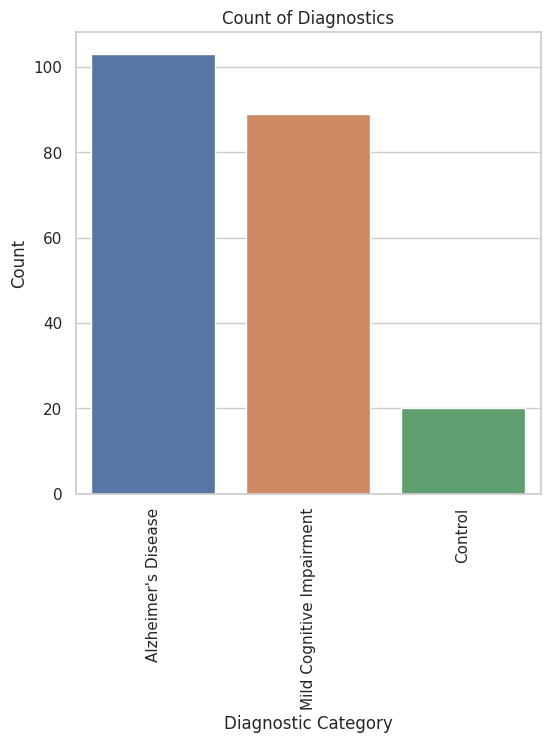

In [80]:
# Bar chart
# seaborn chart

# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# orignal dataset: alz_data
# Copy dataset after handling missing values and converting catagorical value - 
# to numerical values: copy_alz_data

# Set the style of the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

diagnostic_counts = alz_data['Diagnostic'].value_counts().reset_index()
diagnostic_counts.columns = ['Diagnostic', 'Count']

sns.barplot(x='Diagnostic', y='Count', data=diagnostic_counts)
# sns.barplot(x='Diagnostic', y=alz_data['Diagnostic'].index, data=alz_data)

plt.title('Count of Diagnostics')
plt.xlabel('Diagnostic Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

# alz_data['Diagnostic'].value_counts()
# alz_data['Diagnostic'].index

### Another methos

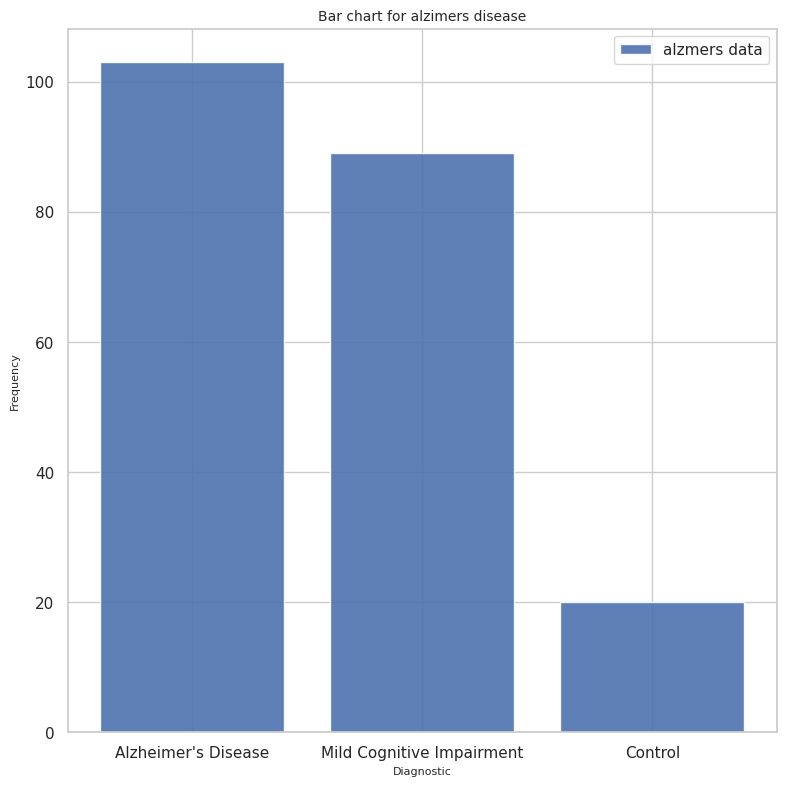

In [81]:
# import
import numpy as np
import matplotlib.pyplot as plt

# Setup figure size
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(8)
fig.set_figheight(8)
fig.set_tight_layout({"pad": 1})

# Subplots
as1 = fig.add_subplot(1,1,1)

targets = alz_data['Diagnostic'].value_counts()

as1.bar(targets.index, targets.values, label = 'alzmers data', alpha = 0.9)
as1.set_ylabel('Frequency',fontsize='8')
as1.set_xlabel('Diagnostic',fontsize='8')


# title legend
as1.set_title('Bar chart for alzimers disease',fontsize=10)

# load legend
as1.legend()
plt.show()

### Another methos

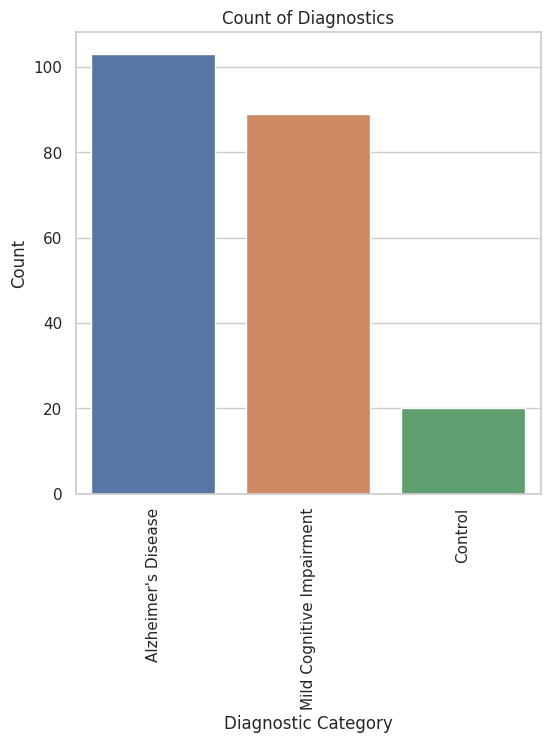

In [82]:
# Bar chart
# seaborn chart

# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# orignal dataset: alz_data
# Copy dataset after handling missing values and converting catagorical value - 
# to numerical values: copy_alz_data

# Set the style of the visualization
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

diagnostic_counts = alz_data['Diagnostic'].value_counts().reset_index()
diagnostic_counts.columns = ['Diagnostic', 'Count']

sns.barplot(x='Diagnostic', y='Count', data=diagnostic_counts)
# sns.barplot(x='Diagnostic', y=alz_data['Diagnostic'].index, data=alz_data)

plt.title('Count of Diagnostics')
plt.xlabel('Diagnostic Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x labels if needed
plt.show()

# alz_data['Diagnostic'].value_counts()
# alz_data['Diagnostic'].index

### Another methos

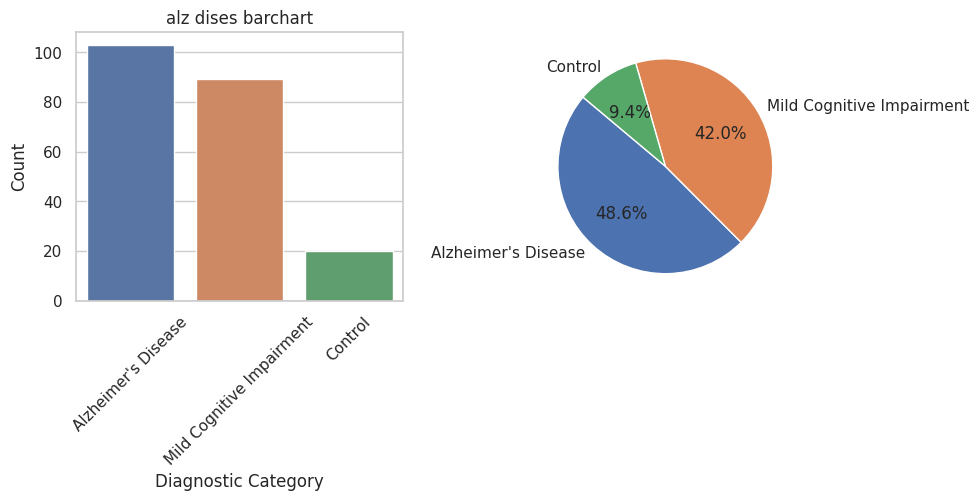

In [83]:
# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Setup figure size
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(10)
fig.set_figheight(8)
fig.set_tight_layout({"pad": 1})



# Subplots
as1 = fig.add_subplot(2,2,1)
as2 = fig.add_subplot(2,2,2)

sns.set(style="whitegrid")

diagnostic_counts = alz_data['Diagnostic'].value_counts().reset_index()
diagnostic_counts.columns = ['Diagnostic', 'Count']

# bar plot
sns.barplot(x='Diagnostic', y='Count', data=diagnostic_counts, ax = as1)
# pie plot
as2.pie(diagnostic_counts['Count'], labels=diagnostic_counts['Diagnostic'], autopct='%1.1f%%', startangle=140)

# Rotate x-axis labels for the bar plot
as1.set_xticklabels(as1.get_xticklabels(), rotation=45)

as1.set_title("alz dises barchart")
as1.set_xlabel('Diagnostic Category')
as1.set_ylabel('Count')

plt.show()

### Observation: 
From the chart we can say that there is only a less number of people that has controled Alzheimer's disease There is a high number of people who are affected with MCI and Alzheimer's disease. 

now we need to concentrate on MCI and Alzheimer's disease so letts just remove the controled cattagory from the dataset 

### Excluding the controle group from the analysis

In [84]:
# exclude the control group from the analysis
fil_dta = alz_data[alz_data['Diagnostic'] != 'Control']
fil_dta['Diagnostic'].value_counts()

Diagnostic
Alzheimer's Disease          103
Mild Cognitive Impairment     89
Name: count, dtype: int64

# Question: Now lets analyse distribution of age in Alzheimer's Disease patients and MCI pationts by gender

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


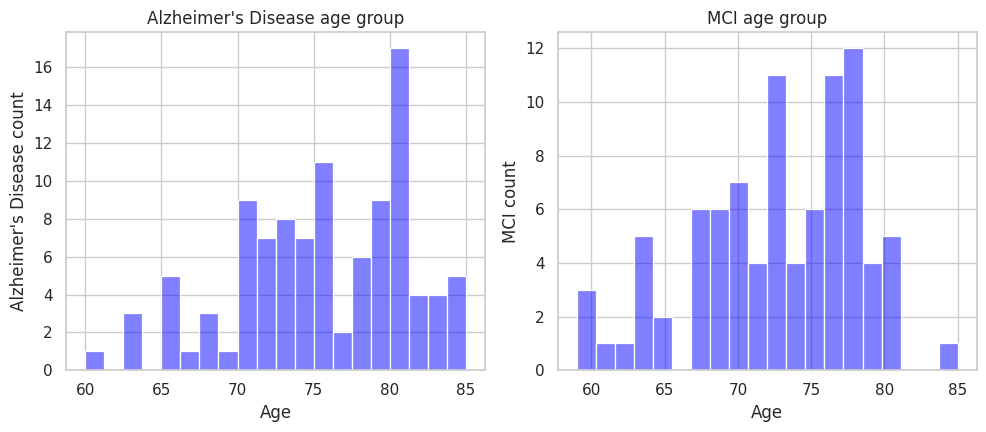

In [85]:
# i am going to find out which age people are more affected with Ad and MCI

fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(10)
fig.set_figheight(8)
fig.set_tight_layout({"pad": 1})



# Subplots
as1 = fig.add_subplot(2,2,1)
as2 = fig.add_subplot(2,2,2)

sns.set(style="whitegrid")



ad_data = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]
mci_data = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]

sns.histplot(ad_data['Age'], bins=20, color='blue', alpha=0.5, label="Alzheimer's Disease", ax= as1)
sns.histplot(mci_data['Age'], bins=20, color='blue', alpha=0.5, label="Mild Cognitive Impairment", ax= as2)

as1.set_title("Alzheimer's Disease age group")
as1.set_xlabel('Age')
as1.set_ylabel("Alzheimer's Disease count")

as2.set_title("MCI age group")
as2.set_xlabel('Age')
as2.set_ylabel("MCI count")

plt.show()

### Observation
The age group of  people affected with AD ana MCI lies between 65 and 85

# Question: Now lets findout wether maile or femail are more affected with AD and MCI

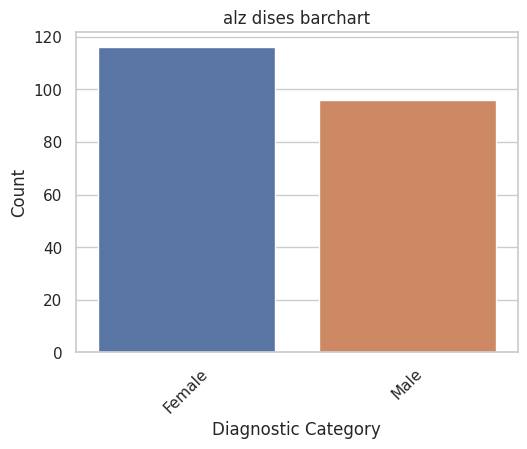

In [86]:
# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Setup figure size
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(10)
fig.set_figheight(8)
fig.set_tight_layout({"pad": 1})



# Subplots
as1 = fig.add_subplot(2,2,1)
# as2 = fig.add_subplot(2,2,2)

sns.set(style="whitegrid")

diagnostic_counts = alz_data['Sex'].value_counts().reset_index()
diagnostic_counts.columns = ['Sex', 'Count']

# bar plot
sns.barplot(x='Sex', y='Count', data=diagnostic_counts, ax = as1)
# pie plot
# as2.pie(diagnostic_counts['Count'], labels=diagnostic_counts['Diagnostic'], autopct='%1.1f%%', startangle=140)

# Rotate x-axis labels for the bar plot
as1.set_xticklabels(as1.get_xticklabels(), rotation=45)

as1.set_title("alz dises barchart")
as1.set_xlabel('Diagnostic Category')
as1.set_ylabel('Count')

plt.show()

In [87]:
alzheimers_disease = diagnostic_group.get_group("Alzheimer's Disease")
alzheimers_disease.Sex.value_counts()

Sex
Female    61
Male      42
Name: count, dtype: int64

### Observation:
more number of Females are afected with Alzheimer's Disease

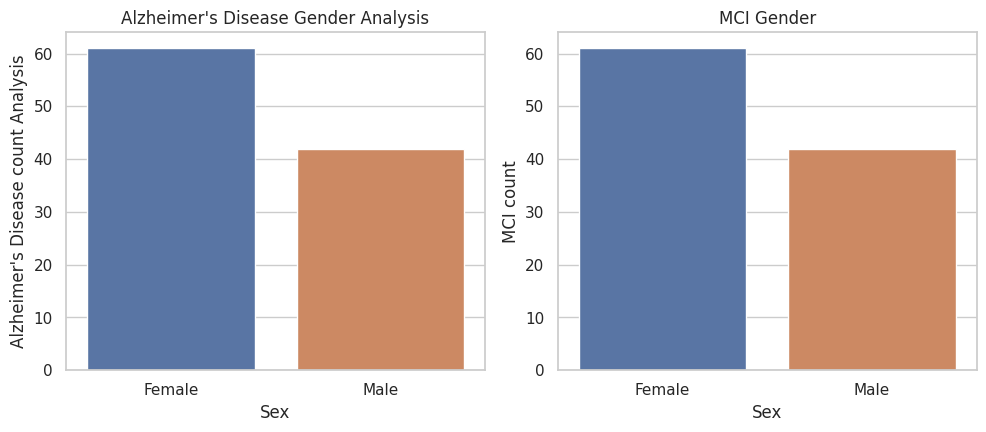

In [88]:
# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Setup figure size
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(10)
fig.set_figheight(8)
fig.set_tight_layout({"pad": 1})


# Subplots
as1 = fig.add_subplot(2,2,1)
as2 = fig.add_subplot(2,2,2)

sns.set(style="whitegrid")

gen_alzheimers_disease = diagnostic_group.get_group("Alzheimer's Disease")
gen_mci = diagnostic_group.get_group("Mild Cognitive Impairment")

# Count gender occurrences in the Alzheimer's Disease group
gender_countsAD = gen_alzheimers_disease['Sex'].value_counts().reset_index()
gender_countsAD.columns = ['Sex', 'Count']
# bar plot
sns.barplot(x='Sex', y='Count', data=gender_countsAD, ax=as1)

# Count gender occurrences in the Alzheimer's Disease group
gender_countsMCI = gen_alzheimers_disease['Sex'].value_counts().reset_index()
gender_countsMCI.columns = ['Sex', 'Count']
# bar plot
sns.barplot(x='Sex', y='Count', data=gender_countsMCI, ax=as2)



as1.set_title("Alzheimer's Disease Gender Analysis")
as1.set_xlabel('Sex')
as1.set_ylabel("Alzheimer's Disease count Analysis")

as2.set_title("MCI Gender")
as2.set_xlabel('Sex')
as2.set_ylabel("MCI count")

plt.show()

### Observation 
Females have more number of cases in both AD and MCI

### Skew
Positive skew and negative skew refer to the asymmetry in the distribution of data. Here’s a detailed comparison between the two:

### Positive Skew (Right Skew)
1. **Shape**:
   - The tail on the right side of the distribution is longer or fatter than the left side.
   - Most of the data values are concentrated on the left side.

2. **Mean, Median, and Mode**:
   - **Mean**: The mean is greater than the median.
   - **Median**: The median is greater than the mode.
   - **Mode**: The mode is the peak of the distribution on the left side.
   - Relationship: Mode < Median < Mean

3. **Examples**:
   - Income distributions where a small number of individuals earn much more than the majority.
   - Age of retirement in certain populations where most people retire at a younger age, but a few retire much later.

4. **Visual Representation**:
   - The bulk of data is on the lower end, with the tail extending to higher values on the right.

5. **Implications**:
   - Indicates that there are a few exceptionally high values (outliers) in the dataset.
   - Central tendency (median) is less affected by these high values, while the mean is pulled to the right.

### Negative Skew (Left Skew)
1. **Shape**:
   - The tail on the left side of the distribution is longer or fatter than the right side.
   - Most of the data values are concentrated on the right side.

2. **Mean, Median, and Mode**:
   - **Mean**: The mean is less than the median.
   - **Median**: The median is less than the mode.
   - **Mode**: The mode is the peak of the distribution on the right side.
   - Relationship: Mean < Median < Mode

3. **Examples**:
   - Scores on an easy exam where most students score high, but a few score much lower.
   - Age at death in populations with high life expectancy but a few early deaths.

4. **Visual Representation**:
   - The bulk of data is on the higher end, with the tail extending to lower values on the left.

5. **Implications**:
   - Indicates that there are a few exceptionally low values (outliers) in the dataset.
   - Central tendency (median) is less affected by these low values, while the mean is pulled to the left.

### Key Points:
- **Positive Skew**: Tail on the right, mean > median > mode.
- **Negative Skew**: Tail on the left, mean < median < mode.
- **Implications**: Outliers affect the mean more than the median, and the direction of the tail indicates the nature of these outliers.

Understanding the skewness of a distribution helps in choosing the right measures of central tendency and dispersion, and in making more accurate interpretations of the data.

# Question: Distribution of MMSE scores in Alzimers disease patients and and MIC patterns by gender
The Mini-Mental State Examination (MMSE) is a widely used tool for assessing cognitive function. In the context of Alzheimer's disease, the MMSE score is used to help evaluate the severity of cognitive impairment. The MMSE consists of 30 points, with higher scores indicating better cognitive function.

Here's a general guideline on how MMSE scores are interpreted in Alzheimer's disease:

- **24-30**: Normal cognitive function or very mild cognitive impairment.
- **18-23**: Mild cognitive impairment, which may be indicative of early-stage Alzheimer's disease.
- **10-17**: Moderate cognitive impairment, which is commonly seen in mid-stage Alzheimer's disease.
- **0-9**: Severe cognitive impairment, which is typical of late-stage Alzheimer's disease.

It is important to note that while the MMSE is useful for screening and tracking the progression of cognitive impairment, it is not diagnostic on its own. A comprehensive assessment by a healthcare professional, including medical history, physical examination, neurological evaluation, and additional cognitive testing, is necessary for an accurate diagnosis of Alzheimer's disease.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

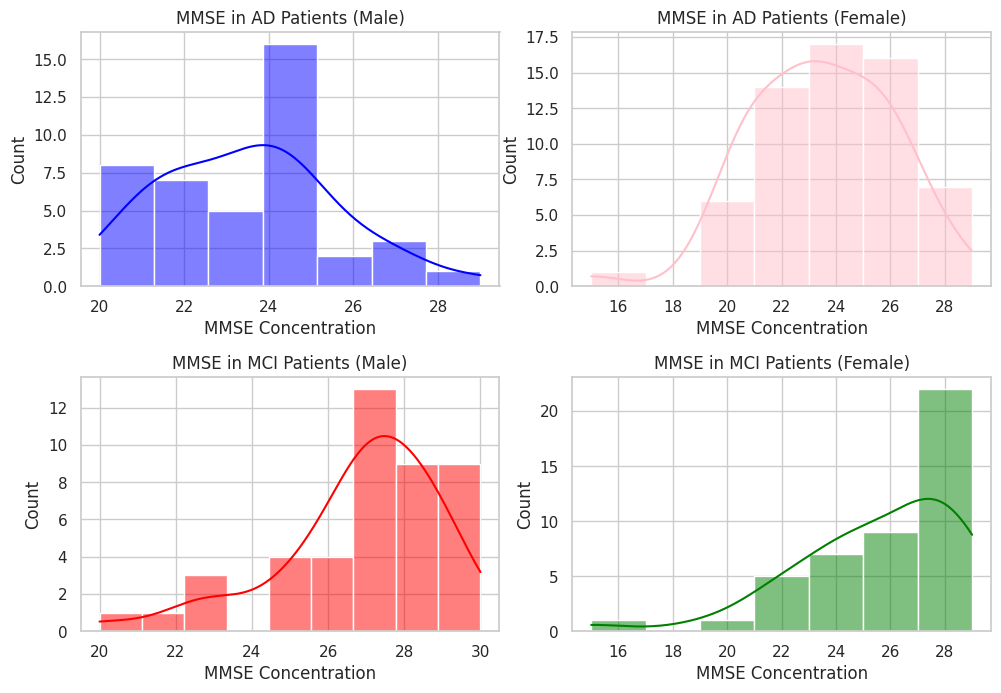

In [89]:
# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Setup figure size
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(10)
fig.set_figheight(10)
fig.set_tight_layout({"pad": 1})


# Subplots
as1 = fig.add_subplot(3,2,1)
as2 = fig.add_subplot(3,2,2)
as3 = fig.add_subplot(3,2,3)
as4 = fig.add_subplot(3,2,4)

sns.set(style="whitegrid")

MMSE_ad_data = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]
MMSE_mci_data = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]

# Plot distribution for Alzheimer's Disease by gender
sns.histplot(MMSE_ad_data[ad_data['Sex'] == 'Male']['MMSE'], ax=as1, kde=True, color='blue')
sns.histplot(MMSE_ad_data[ad_data['Sex'] == 'Female']['MMSE'], ax=as2, kde=True, color='pink')

# Plot distribution for Mild Cognitive Impairment by gender
sns.histplot(MMSE_mci_data[mci_data['Sex'] == 'Male']['MMSE'], ax=as3, kde=True, color='red')
sns.histplot(MMSE_mci_data[mci_data['Sex'] == 'Female']['MMSE'], ax=as4, kde=True, color='green')

# Titles and labels
as1.set_title("MMSE in AD Patients (Male)")
as1.set_xlabel('MMSE Concentration')
as1.set_ylabel('Count')

as2.set_title("MMSE in AD Patients (Female)")
as2.set_xlabel('MMSE Concentration')
as2.set_ylabel('Count')

as3.set_title("MMSE in MCI Patients (Male)")
as3.set_xlabel('MMSE Concentration')
as3.set_ylabel('Count')

as4.set_title("MMSE in MCI Patients (Female)")
as4.set_xlabel('MMSE Concentration')
as4.set_ylabel('Count')

plt.show()

In [90]:
# male AD
print("Mean of Ad (male)",MMSE_ad_data[ad_data['Sex'] == 'Male']['MMSE'].mean())
print("Median of Ad (male)",MMSE_ad_data[ad_data['Sex'] == 'Male']['MMSE'].median())
print("Mode of Ad (male)",MMSE_ad_data[ad_data['Sex'] == 'Male']['MMSE'].mode())
print("---------------------------------------------------------")

# female AD
print("Mean of AD(Female) patents:",MMSE_ad_data[ad_data['Sex'] == 'Female']['MMSE'].mean())
print("Median of AD(Female) patents:",MMSE_ad_data[ad_data['Sex'] == 'Female']['MMSE'].median())
print("Mode of AD(Female) patents:",MMSE_ad_data[ad_data['Sex'] == 'Female']['MMSE'].mode())
print("---------------------------------------------------------")

# maleMCI
print("Mean of MCI (male)",MMSE_mci_data[mci_data['Sex'] == 'Male']['MMSE'].mean())
print("Median of MCI (male)",MMSE_mci_data[mci_data['Sex'] == 'Male']['MMSE'].median())
print("Mode of MCI (male)",MMSE_mci_data[mci_data['Sex'] == 'Male']['MMSE'].mode())
print("---------------------------------------------------------")

# female MCI
print("Mean of MCI (Female)",MMSE_mci_data[mci_data['Sex'] == 'Female']['MMSE'].mean())
print("Median of MCI (Female)",MMSE_mci_data[mci_data['Sex'] == 'Female']['MMSE'].median())
print("Mode of MCI (Female)",MMSE_mci_data[mci_data['Sex'] == 'Female']['MMSE'].mode())

Mean of Ad (male) 23.5
Median of Ad (male) 24.0
Mode of Ad (male) 0    24
Name: MMSE, dtype: int64
---------------------------------------------------------
Mean of AD(Female) patents: 23.459016393442624
Median of AD(Female) patents: 23.0
Mode of AD(Female) patents: 0    23
Name: MMSE, dtype: int64
---------------------------------------------------------
Mean of MCI (male) 26.818181818181817
Median of MCI (male) 27.0
Mode of MCI (male) 0    27
Name: MMSE, dtype: int64
---------------------------------------------------------
Mean of MCI (Female) 25.511111111111113
Median of MCI (Female) 26.0
Mode of MCI (Female) 0    27
1    28
Name: MMSE, dtype: int64


## FacetGrid 
Here we can compare MMSE score together with genter and AD, or MMSE score together with genter and MCI

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

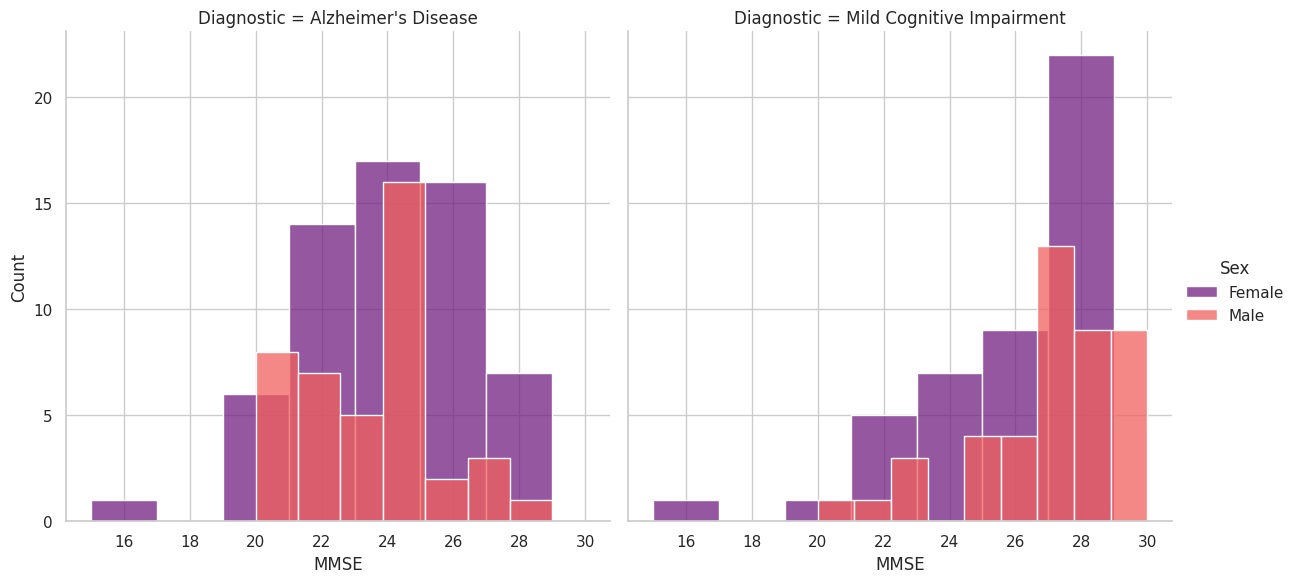

In [91]:
g = sns.FacetGrid(fil_dta, col = 'Diagnostic', hue = 'Sex', palette = 'magma',height=6)

# Map a histogram of 'MMSE' onto each facet
g.map(sns.histplot,'MMSE')

# Add titles to each subplot
# g.set_titles('')

g.add_legend() 

# Show the plot
# plt.show()

### Observation:

**MMSE Score** 
- **24-30: Normal cognitive function or very mild cognitive impairment.**
- **18-23: Mild cognitive impairment, which may be indicative of early-stage Alzheimer's disease.**
- **10-17: Moderate cognitive impairment, which is commonly seen in mid-stage Alzheimer's disease.**
- **0-9: Severe cognitive impairment, which is typical of late-stage Alzheimer's disease.**

***AD***

- Here we can see that half of the females has normal condition andn mild congnitive impariment (showing a bell curve)
- In males the count is arount 15 which are in normale  congnitive and are normal cognitive function chances off risk is low for them
    
***MCI***
- A negetive skew: heigh number of females has repeated scores of MMSE (mode is heigh in -ve skew) that is Normal cognitive function
- Average number of affected people are less

**Cant see any serious issue analysing MMSE Score by gender**

# Question: Distribution of CSF amyloid concentration in AD patient and MCI by gender
Cerebrospinal fluid (CSF) amyloid beta (Aβ) concentrations, particularly amyloid beta 42 (Aβ42), are important biomarkers in the diagnosis and evaluation of Alzheimer's disease. In Alzheimer's disease, the concentration of Aβ42 in the CSF is typically decreased. This is because Aβ42 tends to aggregate and form plaques in the brain, reducing its levels in the CSF.

Here are the typical ranges for CSF Aβ42 in Alzheimer's disease compared to healthy individuals:

- **Healthy individuals**: CSF Aβ42 concentrations are generally higher, typically ranging from around 500 to 1,200 pg/mL, although these values can vary based on the assay used and the laboratory standards.
- **Alzheimer's disease**: CSF Aβ42 concentrations are significantly lower, often falling below 500 pg/mL. Values can be as low as 200 to 500 pg/mL.

These values can vary somewhat depending on the specific methodologies and cutoff points used in different studies and clinical settings. Lower levels of CSF Aβ42 in conjunction with elevated levels of CSF tau proteins (total tau and phosphorylated tau) are indicative of Alzheimer's disease and are used in clinical practice to support the diagnosis.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

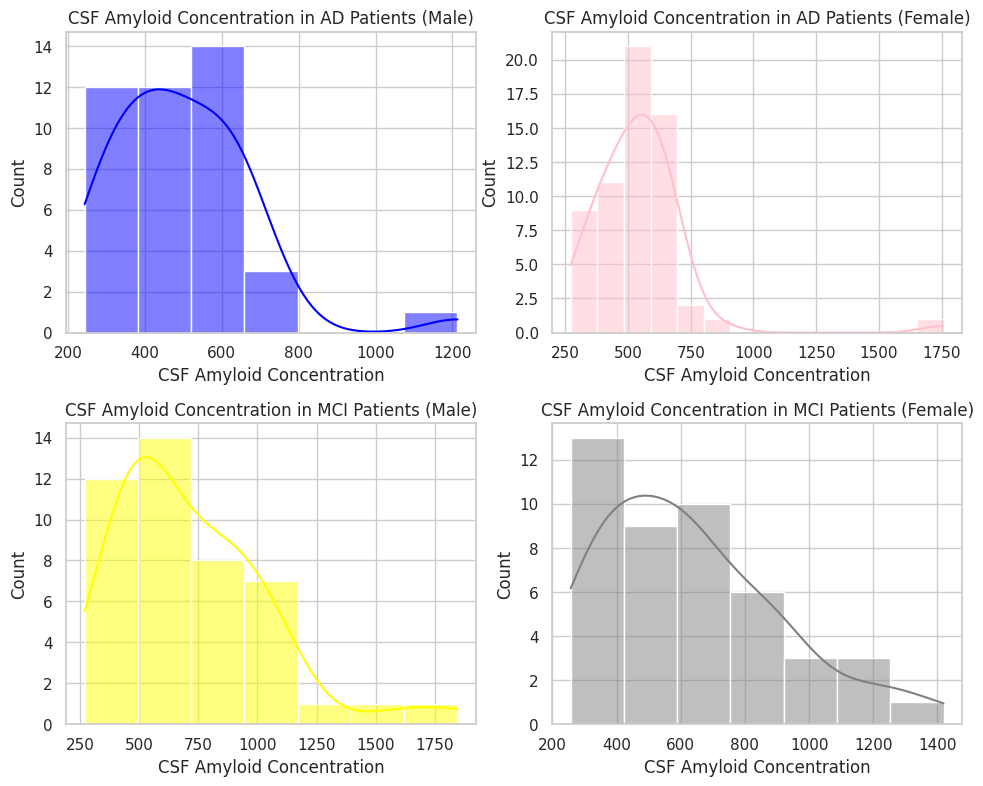

In [92]:
# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Setup figure size
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(10)
fig.set_figheight(8)
fig.set_tight_layout({"pad": 1})


# Subplots
as1 = fig.add_subplot(2,2,1)
as2 = fig.add_subplot(2,2,2)
as3 = fig.add_subplot(2,2,3)
as4 = fig.add_subplot(2,2,4)

sns.set(style="whitegrid")

CSF_ad_data = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]
CSF_mci_data = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]

# Plot distribution for Alzheimer's Disease by gender
sns.histplot(CSF_ad_data[ad_data['Sex'] == 'Male']['CSF Amyloid'], ax=as1, kde=True, color='blue')
sns.histplot(CSF_ad_data[ad_data['Sex'] == 'Female']['CSF Amyloid'], ax=as2, kde=True, color='pink')

# Plot distribution for Mild Cognitive Impairment by gender
sns.histplot(CSF_mci_data[mci_data['Sex'] == 'Male']['CSF Amyloid'], ax=as3, kde=True, color='yellow')
sns.histplot(CSF_mci_data[mci_data['Sex'] == 'Female']['CSF Amyloid'], ax=as4, kde=True, color='grey')


# Titles and labels
as1.set_title("CSF Amyloid Concentration in AD Patients (Male)")
as1.set_xlabel('CSF Amyloid Concentration')
as1.set_ylabel('Count')

as2.set_title("CSF Amyloid Concentration in AD Patients (Female)")
as2.set_xlabel('CSF Amyloid Concentration')
as2.set_ylabel('Count')

as3.set_title("CSF Amyloid Concentration in MCI Patients (Male)")
as3.set_xlabel('CSF Amyloid Concentration')
as3.set_ylabel('Count')

as4.set_title("CSF Amyloid Concentration in MCI Patients (Female)")
as4.set_xlabel('CSF Amyloid Concentration')
as4.set_ylabel('Count')

plt.show()

## FacetGrid
Here we can compare CSF Amyloid score together with genter and AD, or MMSE score together with genter and MCI

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

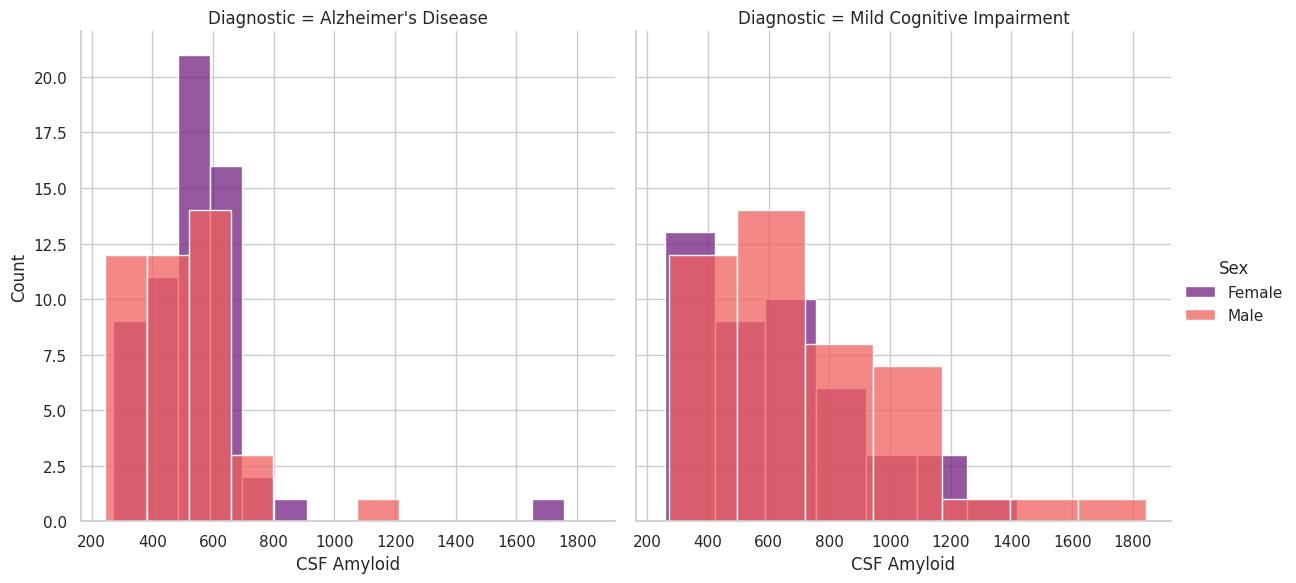

In [93]:
g = sns.FacetGrid(fil_dta, col = 'Diagnostic', hue = 'Sex', palette = 'magma',height=6)

# Map a histogram of 'MMSE' onto each facet
g.map(sns.histplot,'CSF Amyloid')

# Add titles to each subplot
# g.set_titles('')

g.add_legend() 

# Show the plot
# plt.show()

### Observation:
**CSF Amyloid Concentration**
***Healthy individuals: CSF Aβ42 concentrations are generally higher, typically ranging from around 500 to 1,200 pg/mL, although these values can vary based on the assay used and the laboratory standards.***

***Alzheimer's disease: CSF Aβ42 concentrations are significantly lower, often falling below 500 pg/mL. Values can be as low as 200 to 500 pg/mL.***

**AD**

- We can see a heigh number of male and female count in who has CSF amyloid cocentratin 200 to 600
- Among them female has less number of CSF Amyloid concentration meaning CSF Aβ42 concentrations are significantly low for females

**MCI**
- Positively skewed, average is heigh, 
- Average number of MCI pations has significantly low CSF Aβ42 concentrations but is spreaded (Positively skewed)
- Heigh number of males CSF Amyloid Concentration is lesser than 600 (between 200 and 600)
- femails are also not in the same range 

**My anaysis is CSF Amyloid Concentration is very low for who are affected with MCI**

# Question: Distribution of CSF Total tau in ad and mci by gender


In Alzheimer's disease, the concentration of total tau (t-tau) in cerebrospinal fluid (CSF) is typically elevated. Tau proteins are associated with the microtubule structure in neurons, and their increased levels in the CSF reflect neuronal damage and degeneration, which are characteristic of Alzheimer's disease.

Here's a general guideline on CSF total tau concentrations:

- **Healthy individuals**: CSF total tau levels are generally lower, typically less than 300 pg/mL.
- **Alzheimer's disease**: CSF total tau levels are elevated, often exceeding 400 pg/mL. In some cases, they can be significantly higher, sometimes ranging from 400 to over 1,000 pg/mL depending on the severity of the disease and the specific assays used.

The elevated levels of CSF total tau, particularly when found in conjunction with decreased levels of CSF amyloid beta 42 (Aβ42), are used as biomarkers to support the diagnosis of Alzheimer's disease. These biomarkers help in distinguishing Alzheimer's disease from other forms of dementia and cognitive impairment.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

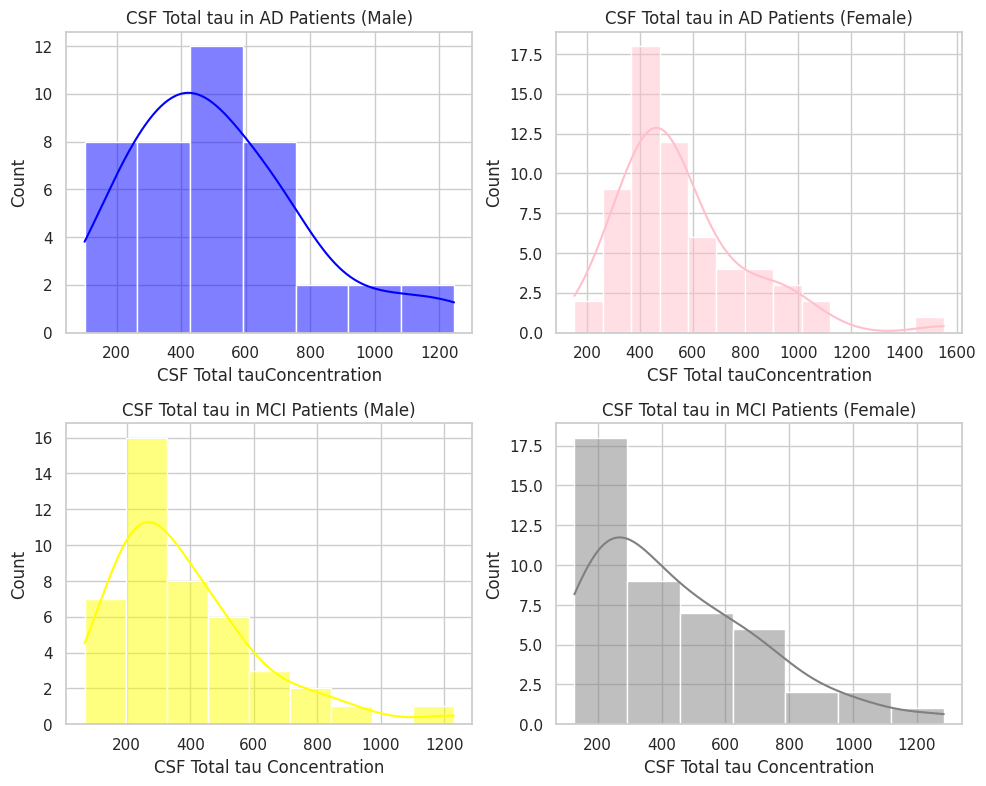

In [94]:
# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Setup figure size
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(10)
fig.set_figheight(8)
fig.set_tight_layout({"pad": 1})


# Subplots
as1 = fig.add_subplot(2,2,1)
as2 = fig.add_subplot(2,2,2)
as3 = fig.add_subplot(2,2,3)
as4 = fig.add_subplot(2,2,4)

sns.set(style="whitegrid")

CSF_ad_data = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]
CSF_mci_data = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]

# Plot distribution for Alzheimer's Disease by gender
sns.histplot(CSF_ad_data[ad_data['Sex'] == 'Male']['CSF Total tau'], ax=as1, kde=True, color='blue')
sns.histplot(CSF_ad_data[ad_data['Sex'] == 'Female']['CSF Total tau'], ax=as2, kde=True, color='pink')

# Plot distribution for Mild Cognitive Impairment by gender
sns.histplot(CSF_mci_data[mci_data['Sex'] == 'Male']['CSF Total tau'], ax=as3, kde=True, color='yellow')
sns.histplot(CSF_mci_data[mci_data['Sex'] == 'Female']['CSF Total tau'], ax=as4, kde=True, color='grey')


# Titles and labels
as1.set_title("CSF Total tau in AD Patients (Male)")
as1.set_xlabel('CSF Total tauConcentration')
as1.set_ylabel('Count')

as2.set_title("CSF Total tau in AD Patients (Female)")
as2.set_xlabel('CSF Total tauConcentration')
as2.set_ylabel('Count')

as3.set_title("CSF Total tau in MCI Patients (Male)")
as3.set_xlabel('CSF Total tau Concentration')
as3.set_ylabel('Count')

as4.set_title("CSF Total tau in MCI Patients (Female)")
as4.set_xlabel('CSF Total tau Concentration')
as4.set_ylabel('Count')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

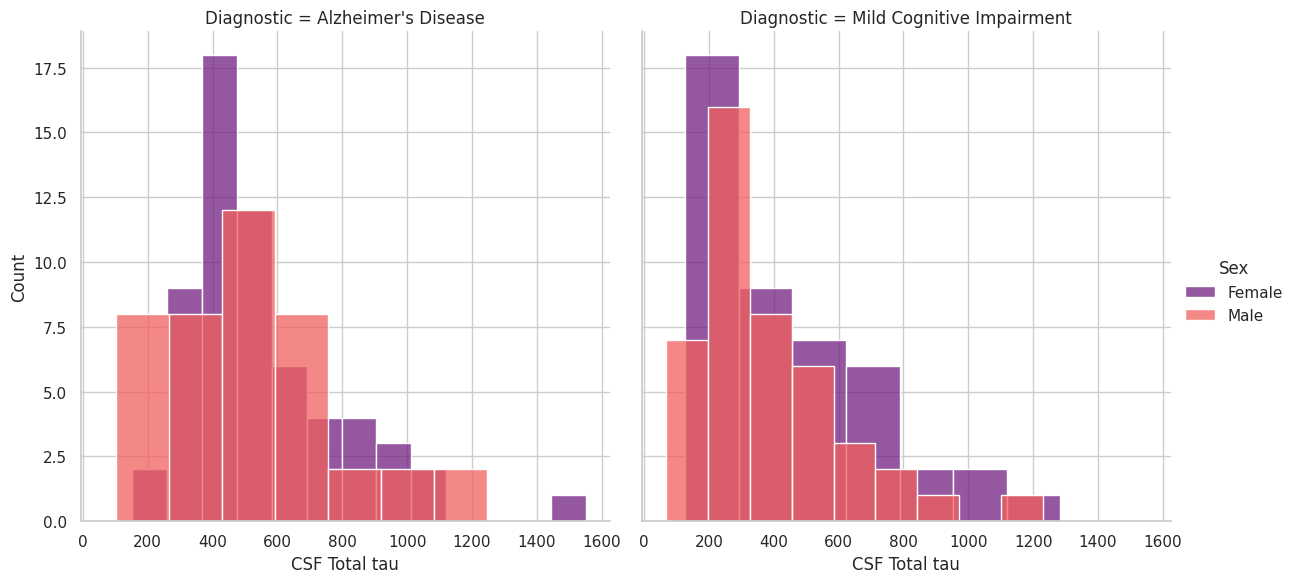

In [95]:
g = sns.FacetGrid(fil_dta, col = 'Diagnostic', hue = 'Sex', palette = 'magma',height=6)

# Map a histogram of 'MMSE' onto each facet
g.map(sns.histplot,'CSF Total tau')

# Add titles to each subplot
# g.set_titles('')

g.add_legend() 

# Show the plot
# plt.show()

### Observaion:

The provided histograms display the distribution of CSF total tau levels among individuals diagnosed with Alzheimer's disease and those diagnosed with Mild Cognitive Impairment (MCI). The data is further categorized by sex (Female in purple, Male in red).

### Analysis of the Charts:

1. **Distribution in Alzheimer's Disease**:
   - The histogram for Alzheimer's disease shows a wider spread of CSF total tau levels compared to MCI.
   - The most frequent CSF total tau levels for Alzheimer's patients are clustered between 300 and 600 pg/mL.
   - There are instances of very high CSF total tau levels (up to 1600 pg/mL), but these are less frequent.
   - Both male and female distributions show similar patterns, but females have a slightly higher count in the lower range (300-600 pg/mL).

2. **Distribution in Mild Cognitive Impairment (MCI)**:
   - The histogram for MCI shows a narrower spread of CSF total tau levels compared to Alzheimer's disease.
   - The most frequent CSF total tau levels for MCI patients are between 200 and 400 pg/mL.
   - There are fewer instances of very high CSF total tau levels in MCI patients compared to Alzheimer's patients.
   - Both male and female distributions are similar, but males have a slightly higher count in the lower range (200-400 pg/mL).

### Conclusion:
- **CSF Total Tau Levels**:
  - In Alzheimer's disease, CSF total tau levels are generally higher and show a broader distribution. This supports the understanding that Alzheimer's disease is associated with greater neuronal damage, reflected by higher total tau levels.
  - In MCI, CSF total tau levels are generally lower and more tightly clustered, suggesting less neuronal damage compared to Alzheimer's disease.

- **Sex Differences**:
  - There are no substantial differences between males and females in the distribution of CSF total tau levels in either diagnostic group. Both sexes show similar patterns in their respective diagnostic categories.

The histograms align with the known biomarker profiles for Alzheimer's disease and MCI, where higher CSF total tau levels are indicative of more severe neurodegeneration typically seen in Alzheimer's disease.

# Question: Distribution of CSF Phosphorylated tau concentration in AD patient and MCI by gende
In Alzheimer's disease, the concentration of cerebrospinal fluid (CSF) phosphorylated tau (p-tau) is typically elevated. Phosphorylated tau is a biomarker that reflects tau pathology and neurofibrillary tangles, which are characteristic of Alzheimer's disease.

### Typical Ranges for CSF Phosphorylated Tau:

- **Healthy Individuals**: CSF p-tau levels are generally lower, typically less than 60 pg/mL.
- **Alzheimer's Disease**: CSF p-tau levels are elevated, often exceeding 60 pg/mL. In some cases, values can be significantly higher, ranging from 60 to 120 pg/mL or more, depending on the severity of the disease and the specific assay used.

### Interpretation:
- Elevated levels of CSF p-tau, in combination with decreased levels of CSF amyloid beta 42 (Aβ42) and increased levels of CSF total tau, are used as biomarkers to support the diagnosis of Alzheimer's disease.
- The elevation of p-tau specifically indicates the presence of tau hyperphosphorylation and tau tangles, which are critical pathological features of Alzheimer's disease.

These biomarkers are valuable in distinguishing Alzheimer's disease from other forms of dementia and cognitive impairment, aiding in early diagnosis and monitoring disease progression.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

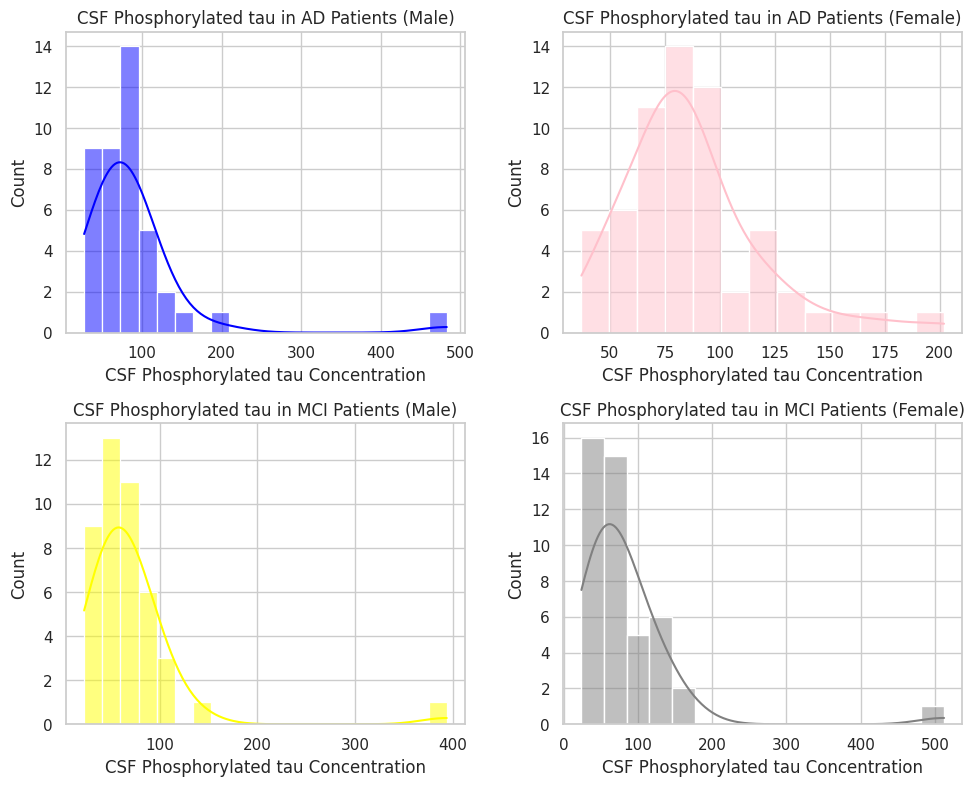

In [96]:
# importing the necessory liberarious
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Setup figure size
fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.8)

fig.set_figwidth(10)
fig.set_figheight(8)
fig.set_tight_layout({"pad": 1})


# Subplots
as1 = fig.add_subplot(2,2,1)
as2 = fig.add_subplot(2,2,2)
as3 = fig.add_subplot(2,2,3)
as4 = fig.add_subplot(2,2,4)

sns.set(style="whitegrid")

CSF_ad_data = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]
CSF_mci_data = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]

# Plot distribution for Alzheimer's Disease by gender
sns.histplot(CSF_ad_data[ad_data['Sex'] == 'Male']['CSF Phosphorylated tau'], ax=as1, kde=True, color='blue')
sns.histplot(CSF_ad_data[ad_data['Sex'] == 'Female']['CSF Phosphorylated tau'], ax=as2, kde=True, color='pink')

# Plot distribution for Mild Cognitive Impairment by gender
sns.histplot(CSF_mci_data[mci_data['Sex'] == 'Male']['CSF Phosphorylated tau'], ax=as3, kde=True, color='yellow')
sns.histplot(CSF_mci_data[mci_data['Sex'] == 'Female']['CSF Phosphorylated tau'], ax=as4, kde=True, color='grey')


# Titles and labels
as1.set_title("CSF Phosphorylated tau in AD Patients (Male)")
as1.set_xlabel('CSF Phosphorylated tau Concentration')
as1.set_ylabel('Count')

as2.set_title("CSF Phosphorylated tau in AD Patients (Female)")
as2.set_xlabel('CSF Phosphorylated tau Concentration')
as2.set_ylabel('Count')

as3.set_title("CSF Phosphorylated tau in MCI Patients (Male)")
as3.set_xlabel('CSF Phosphorylated tau Concentration')
as3.set_ylabel('Count')

as4.set_title("CSF Phosphorylated tau in MCI Patients (Female)")
as4.set_xlabel('CSF Phosphorylated tau Concentration')
as4.set_ylabel('Count')

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

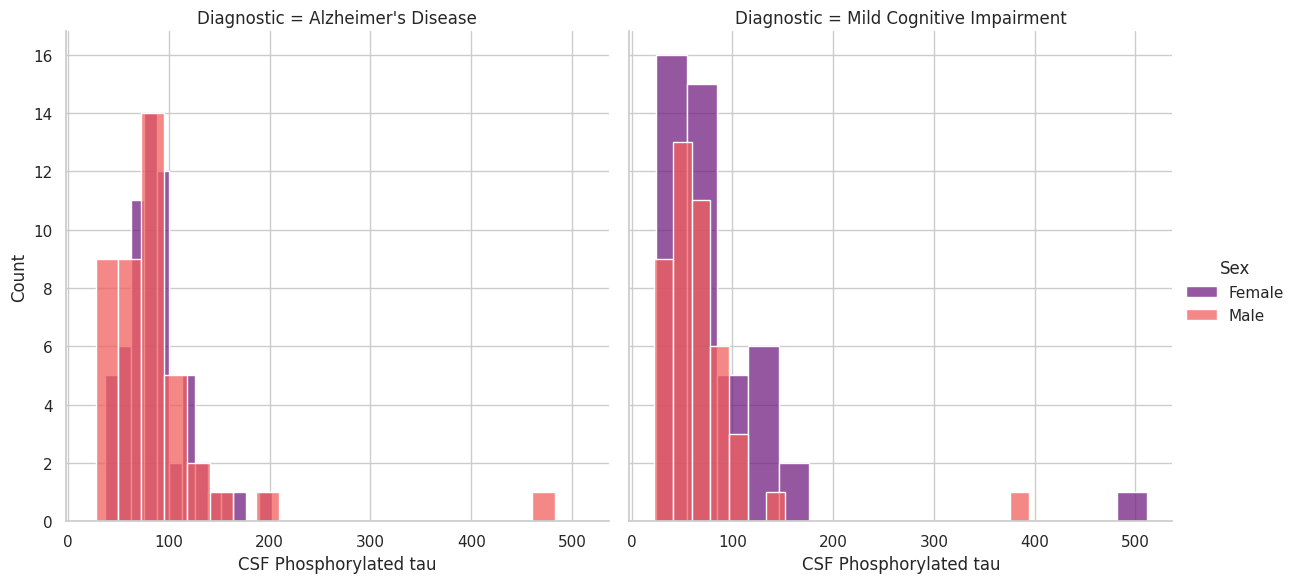

In [97]:
g = sns.FacetGrid(fil_dta, col = 'Diagnostic', hue = 'Sex', palette = 'magma',height=6)

# Map a histogram of 'MMSE' onto each facet
g.map(sns.histplot,'CSF Phosphorylated tau')

# Add titles to each subplot
# g.set_titles('')

g.add_legend() 

# Show the plot
# plt.show()

### Observation: 

- The most frequent CSF Phosphorylated tau levels for Alzheimer's patients are clustered between 60 and 200 which is heigher indicating heigh rick in both AD and MCI 
- The elevation of p-tau specifically indicates the presence of tau hyperphosphorylation and tau tangles, which are critical pathological features of Alzheimer's disease. in both conditions


# Question: Distribution of MMSE concentration in AD patient and MCI by age

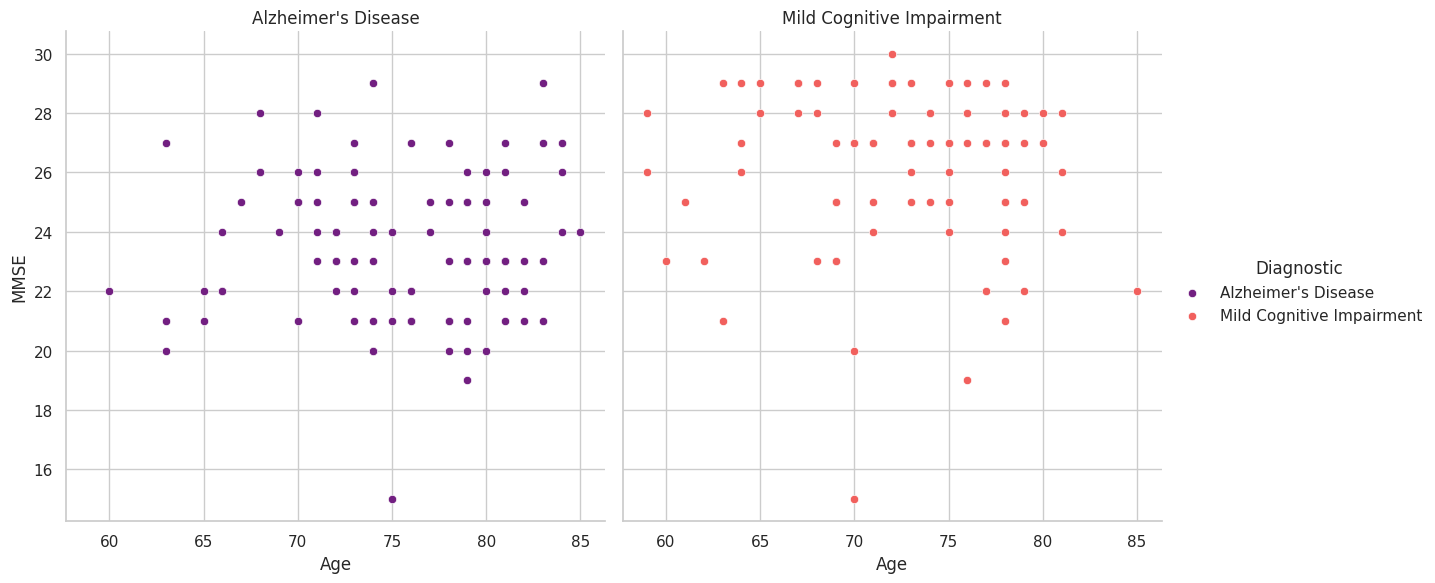

In [98]:
# Adjust the FacetGrid height if necessary
g = sns.FacetGrid(fil_dta, col='Diagnostic', hue='Diagnostic', palette='magma', height=6)

# Map a scatter plot of 'Age' vs 'MMSE' onto each facet
g.map(sns.scatterplot, 'Age', 'MMSE')

# Add titles to each subplot based on the Diagnostic column
g.set_titles("{col_name}")

# Add legends
g.add_legend()

# Show the plot
plt.show()


### Observation:
The provided scatter plots show the relationship between age and MMSE for individuals diagnosed with Alzheimer's disease (purple dots) and Mild Cognitive Impairment (MCI) (red dots).

### Analysis of the Charts:

1. **Alzheimer's Disease**:
   - **Age Range**:The ages of individuals with Alzheimer's disease range from about 60 to 85 years.
   - **MMSE**: The MMSE Score in Alzheimer's patients exhibit a wide range, from about 20 to 30.
   - **Pattern**: There is no clear linear relationship between age and MMSE Score, are not strongly dependent on age within this group. However, there is a notable clustering of MMSE Score between 20 and 30 points.

2. **Mild Cognitive Impairment (MCI):**:
   - **Age Range**:The ages of individuals with Alzheimer's disease range from about 60 to 80 years.
   - **MMSE**: The MMSE score in Alzheimer's patients has a range fromo about 200 to 30points.
   - **Pattern**: There is no clear linear relationship between age and MMSE score, are not strongly dependent on age within this group, and are more spreaded

# Question: Distribution of CSF Amyloid concentration in AD patient and MCI by age

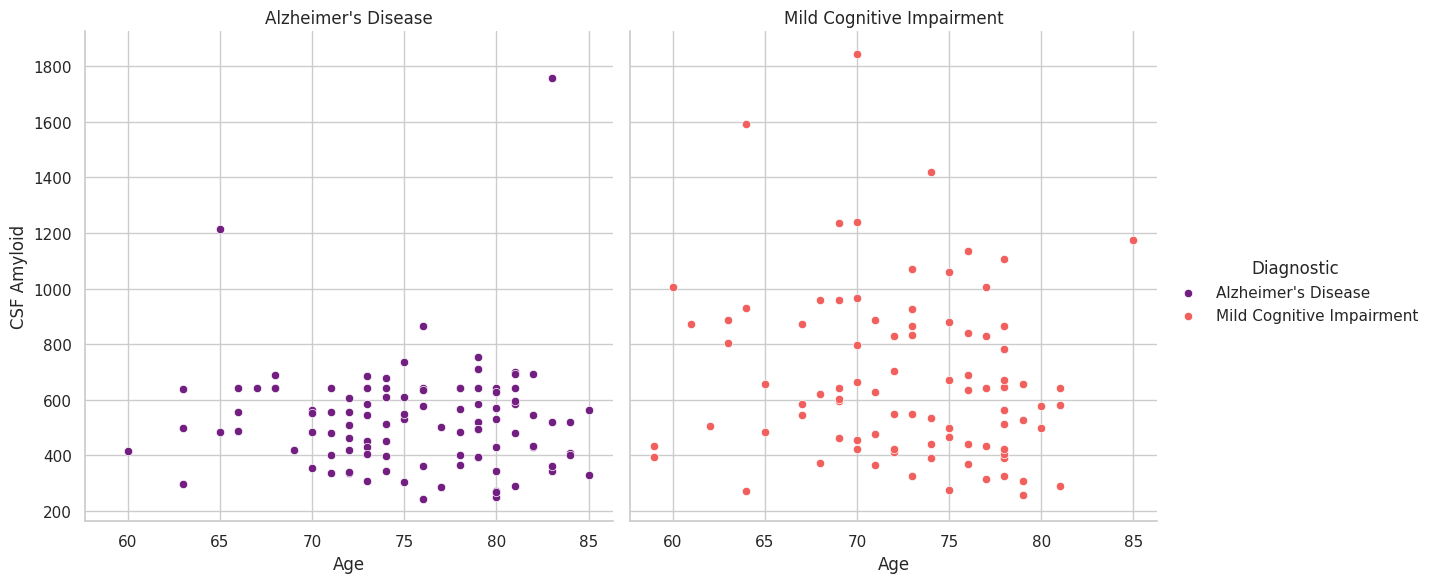

In [99]:
# Adjust the FacetGrid height if necessary
g = sns.FacetGrid(fil_dta, col='Diagnostic', hue='Diagnostic', palette='magma', height=6)

# Map a scatter plot of 'Age' vs 'MMSE' onto each facet
g.map(sns.scatterplot, 'Age', 'CSF Amyloid')

# Add titles to each subplot based on the Diagnostic column
g.set_titles("{col_name}")

# Add legends
g.add_legend()

# Show the plot
plt.show()


### Observation:
The provided scatter plots show the relationship between age and CSF Amyloid Concentation levels for individuals diagnosed with Alzheimer's disease (purple dots) and Mild Cognitive Impairment (MCI) (red dots).

### Analysis of the Charts:

1. **Alzheimer's Disease**:
   - **Age Range**:The ages of individuals with Alzheimer's disease range from about 60 to 85 years.
   - **CSF Amyloid Concentration**: The CSF Amyloid Concentration levels in Alzheimer's patients exhibit a wide range, from about 200 pg/mL to over 1000 pg/mL.
   - **Pattern**: There is no clear linear relationship between age and CSF Amyloid Concentration levels, are not strongly dependent on age within this group. However, there is a notable clustering of CSF Amyloid Concentration levels between 400 and 800 pg/mL.

2. **Mild Cognitive Impairment (MCI):**:
   - **Age Range**:The ages of individuals with Alzheimer's disease range from about 60 to 80 years.
   - **CSF Amyloid Concentration**: The CSF Amyloid Concentration levels in Alzheimer's patients has a range fromo about 200 to 1200 pg/mL.
   - **Pattern**: There is no clear linear relationship between age and CSF Amyloid Concentration levels, are not strongly dependent on age within this group. However, 


# Question: Distribution of CSF Total tau concentration in AD patient and MCI by age

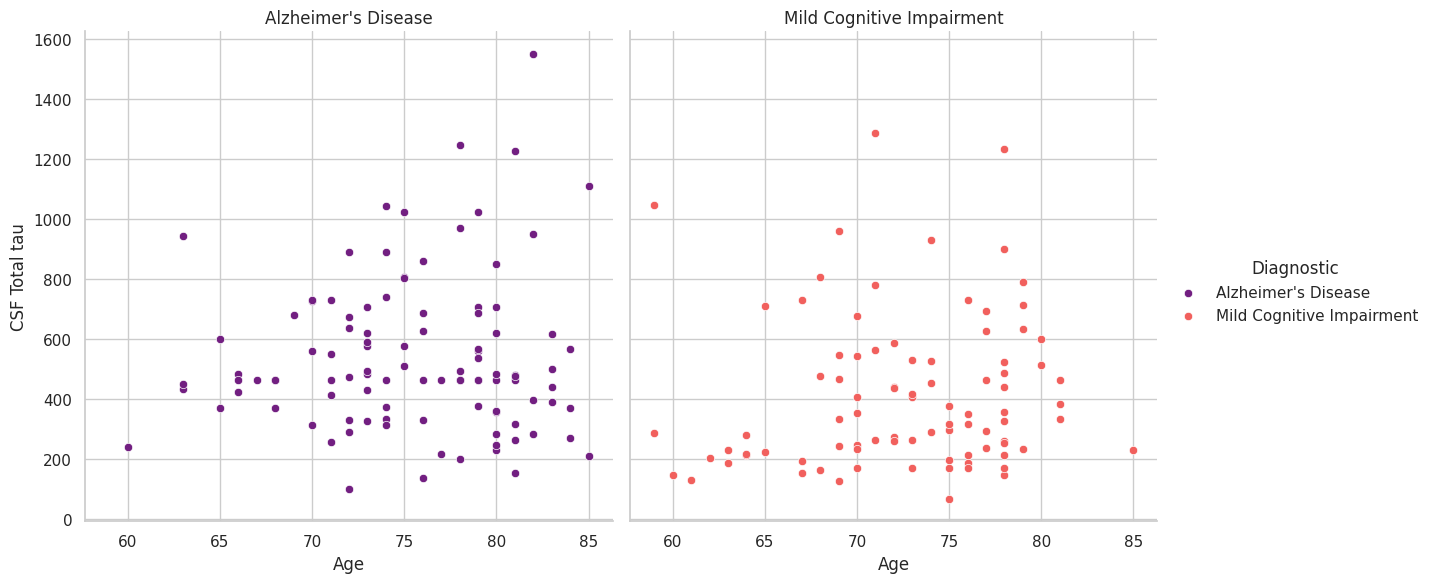

In [100]:
# Adjust the FacetGrid height if necessary
g = sns.FacetGrid(fil_dta, col='Diagnostic', hue='Diagnostic', palette='magma', height=6)

# Map a scatter plot of 'Age' vs 'MMSE' onto each facet
g.map(sns.scatterplot, 'Age', 'CSF Total tau')

# Add titles to each subplot based on the Diagnostic column
g.set_titles("{col_name}")

# Add legends
g.add_legend()

# Show the plot
plt.show()


### Observation:
The provided scatter plots show the relationship between age and CSF total tau levels for individuals diagnosed with Alzheimer's disease (purple dots) and Mild Cognitive Impairment (MCI) (red dots).

### Analysis of the Charts:

1. **Alzheimer's Disease**:
   - **Age Range**: The ages of individuals with Alzheimer's disease range from about 60 to 85 years.
   - **CSF Total Tau Levels**: The CSF total tau levels in Alzheimer's patients exhibit a wide range, from about 200 pg/mL to over 1400 pg/mL.
   - **Pattern**: There is no clear linear relationship between age and CSF total tau levels, indicating that the total tau levels are variable and not strongly dependent on age within this group. However, there is a notable clustering of total tau levels between 400 and 1000 pg/mL.

2. **Mild Cognitive Impairment (MCI)**:
   - **Age Range**: The ages of individuals with MCI also range from about 60 to 85 years.
   - **CSF Total Tau Levels**: The CSF total tau levels in MCI patients generally range from about 100 pg/mL to 800 pg/mL.
   - **Pattern**: Similar to the Alzheimer's group, there is no clear linear relationship between age and CSF total tau levels. However, the total tau levels in the MCI group are generally lower than those in the Alzheimer's group, with a significant clustering between 200 and 400 pg/mL.

### Conclusion:
- **CSF Total Tau Levels**:
  - **Alzheimer's Disease**: Individuals with Alzheimer's disease tend to have higher and more variable CSF total tau levels, reflecting greater neuronal damage and degeneration associated with the disease. The range is broader and includes higher values than those seen in MCI patients.
  - **Mild Cognitive Impairment**: Individuals with MCI generally have lower CSF total tau levels compared to those with Alzheimer's disease. The levels are more tightly clustered, suggesting less severe neuronal damage compared to Alzheimer's disease.

- **Age and CSF Total Tau Relationship**:
  - There is no strong correlation between age and CSF total tau levels in either group, indicating that the increase in total tau is more closely related to disease progression rather than age alone.

Overall, the scatter plots illustrate that CSF total tau levels are significantly higher in Alzheimer's disease compared to MCI, supporting the use of total tau as a biomarker to differentiate between these conditions. The lack of a clear age dependency within each group suggests that total tau levels are a more direct indicator of disease pathology rather than simply reflecting age-related changes.

# Question: Distribution of CSF Phosphorylated tau concentration in AD patient and MCI by age

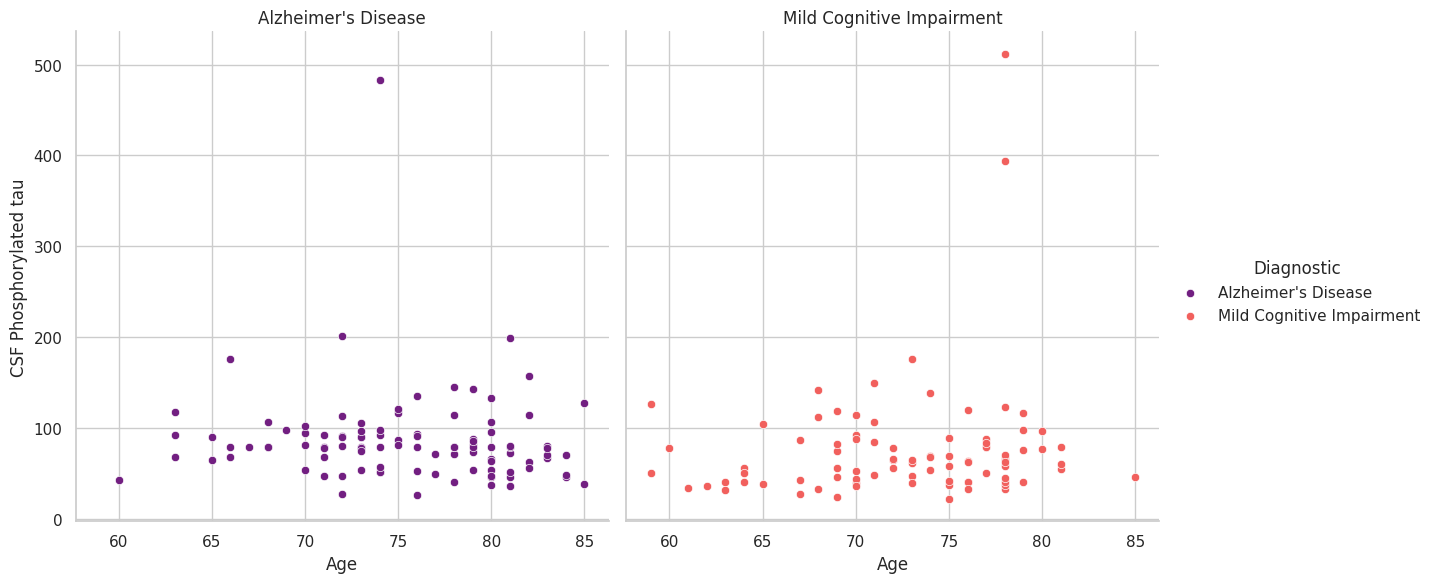

In [101]:
# Adjust the FacetGrid height if necessary
g = sns.FacetGrid(fil_dta, col='Diagnostic', hue='Diagnostic', palette='magma', height=6)

# Map a scatter plot of 'Age' vs 'MMSE' onto each facet
g.map(sns.scatterplot, 'Age', 'CSF Phosphorylated tau')

# Add titles to each subplot based on the Diagnostic column
g.set_titles("{col_name}")

# Add legends
g.add_legend()

# Show the plot
plt.show()


### Observation:
### Observation:
The provided scatter plots show the relationship between age and CSF Phosphorylated tau concentration levels for individuals diagnosed with Alzheimer's disease (purple dots) and Mild Cognitive Impairment (MCI) (red dots).

### Analysis of the Charts:

1. **Alzheimer's Disease**:
   - **Age Range**:The ages of individuals with Alzheimer's disease range from about 60 to 85 years.
   - **CSF Phosphorylated tau concentration**: The CSF Phosphorylated tau concentration levels in Alzheimer's range betweeen 0 to 200
   - **Pattern**: There is no clear linear relationship between age and CSF Amyloid Concentration levels, are not strongly dependent on age within this group.

2. **Mild Cognitive Impairment (MCI):**:
   - **Age Range**:The ages of individuals with Alzheimer's disease range from about 60 to 85 years.
   - **CSF Phosphorylated tau concentration**: The CSF Phosphorylated tau concentration levels in Alzheimer's range betweeen 0 to 200
   - **Pattern**: There is no clear linear relationship between age and CSF Phosphorylated tau concentration levels, are not strongly dependent on age within this group.


# Box Plot to find outlayers

In [102]:
# Renaming the columns for because caught an error
azcopy = alz_data.copy()
azcopy.rename(columns= {"CSF Amyloid": "CSF_Amyloid","CSF Total tau":"CSF_Total_tau","CSF Phosphorylated tau":"CSF_Phosphorylated_tau"}, inplace = True)
azcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    object 
 1   Sex                     212 non-null    object 
 2   Age                     212 non-null    int64  
 3   MMSE                    212 non-null    int64  
 4   CSF_Amyloid             212 non-null    float64
 5   CSF_Total_tau           212 non-null    float64
 6   CSF_Phosphorylated_tau  212 non-null    float64
 7   APOE4                   212 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB


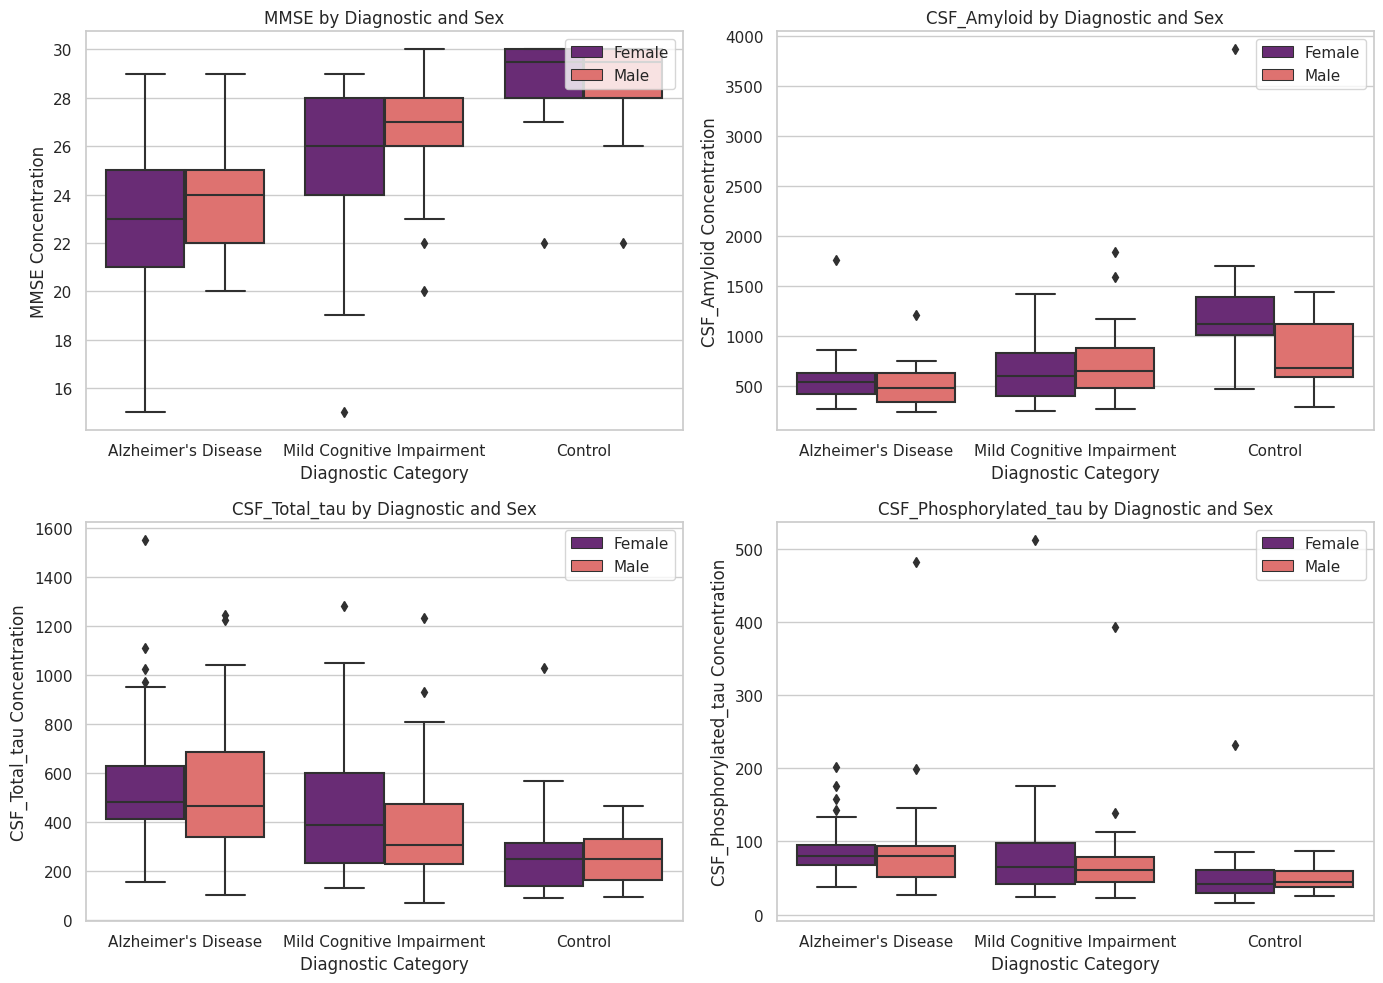

In [103]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Setup the figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Titles for each subplot
titles = ['MMSE', 'CSF_Amyloid', 'CSF_Total_tau', 'CSF_Phosphorylated_tau']

# Loop through the axes and plot the box plots
for ax, title in zip(axes.flatten(), titles):
    sns.boxplot(data=azcopy, x='Diagnostic', y=title.replace(' ', '_'), hue='Sex', palette='magma', ax=ax)
    ax.set_title(f'{title} by Diagnostic and Sex')
    ax.set_xlabel('Diagnostic Category')
    ax.set_ylabel(f'{title} Concentration')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


# Statistical Analysis

## Descriptive Statistics


In [104]:
# Descriptive statistics for MMSE scores with sex
descriptive_stats = alz_data.groupby(['Diagnostic', 'Sex'])['MMSE'].describe()
descriptive_stats

count       mean       std   min   25%  \
Diagnostic                Sex                                              
Alzheimer's Disease       Female   61.0  23.459016  2.624079  15.0  21.0   
                          Male     42.0  23.500000  2.063031  20.0  22.0   
Control                   Female   10.0  28.400000  2.503331  22.0  28.0   
                          Male     10.0  28.300000  2.584140  22.0  28.0   
Mild Cognitive Impairment Female   45.0  25.511111  3.019800  15.0  24.0   
                          Male     44.0  26.818182  2.105063  20.0  26.0   

                                   50%   75%   max  
Diagnostic                Sex                       
Alzheimer's Disease       Female  23.0  25.0  29.0  
                          Male    24.0  25.0  29.0  
Control                   Female  29.5  30.0  30.0  
                          Male    29.5  30.0  30.0  
Mild Cognitive Impairment Female  26.0  28.0  29.0  
                          Male    27.0  28.0  30.0

In [105]:
# Descriptive statistics for MMSE scores with sex
descriptive_stats2 = alz_data.groupby(['Diagnostic', 'Sex'])['CSF Amyloid'].describe()
descriptive_stats2

count         mean         std    min  \
Diagnostic                Sex                                             
Alzheimer's Disease       Female   61.0   544.202103  201.628932  271.0   
                          Male     42.0   494.798100  181.683074  243.0   
Control                   Female   10.0  1390.000000  930.035125  470.0   
                          Male     10.0   833.600000  381.216532  291.0   
Mild Cognitive Impairment Female   45.0   628.508979  281.732323  257.0   
                          Male     44.0   722.702365  322.744786  270.0   

                                      25%         50%      75%     max  
Diagnostic                Sex                                           
Alzheimer's Disease       Female   419.00   544.00000   635.00  1758.0  
                          Male     348.75   481.00000   630.00  1213.0  
Control                   Female  1010.25  1123.50000  1389.75  3863.0  
                          Male     591.00   687.00000  1120.75  1442.0  
Mild Cognitive Impairment Female   403.00   604.00000   829.00  1419.0  
                          Male     483.25   652.45202   886.25  1845.0

In [106]:
descriptive_stats3 = alz_data.groupby(['Diagnostic', 'Sex'])['CSF Total tau'].describe()
descriptive_stats3

count        mean         std    min  \
Diagnostic                Sex                                            
Alzheimer's Disease       Female   61.0  555.898410  245.969581  153.0   
                          Male     42.0  519.292569  275.424199  101.0   
Control                   Female   10.0  322.520000  285.824331   86.2   
                          Male     10.0  260.270000  123.100574   90.7   
Mild Cognitive Impairment Female   45.0  445.516835  269.214465  127.0   
                          Male     44.0  382.417218  234.342210   67.1   

                                     25%         50%     75%     max  
Diagnostic                Sex                                         
Alzheimer's Disease       Female  412.00  482.000000  627.00  1550.0  
                          Male    339.00  464.257576  684.00  1246.0  
Control                   Female  139.00  247.500000  313.50  1030.0  
                          Male    161.75  248.000000  330.75   463.0  
Mild Cognitive Impairment Female  231.00  385.000000  600.00  1284.0  
                          Male    225.50  306.500000  470.50  1231.0

In [107]:
descriptive_stats4 = alz_data.groupby(['Diagnostic', 'Sex'])['CSF Phosphorylated tau'].describe()
descriptive_stats4

count       mean        std   min     25%  \
Diagnostic                Sex                                                 
Alzheimer's Disease       Female   61.0  86.550075  31.065030  37.0  68.000   
                          Male     42.0  87.323377  70.984488  27.1  52.000   
Control                   Female   10.0  62.370000  63.201689  15.6  30.125   
                          Male     10.0  50.260000  19.540681  25.4  37.275   
Mild Cognitive Impairment Female   45.0  83.667475  74.194058  24.1  42.200   
                          Male     44.0  70.155372  55.905375  22.4  45.150   

                                        50%     75%    max  
Diagnostic                Sex                               
Alzheimer's Disease       Female  79.836364  95.000  202.0  
                          Male    79.836364  93.250  483.0  
Control                   Female  41.100000  61.125  232.0  
                          Male    45.050000  60.175   87.3  
Mild Cognitive Impairment Female  64.400000  97.300  512.0  
                          Male    60.700000  78.275  394.0

In [108]:
# Range
rnge = descriptive_stats['max'] - descriptive_stats['min']
rnge

Diagnostic                 Sex   
Alzheimer's Disease        Female    14.0
                           Male       9.0
Control                    Female     8.0
                           Male       8.0
Mild Cognitive Impairment  Female    14.0
                           Male      10.0
dtype: float64

In [109]:
# IQR
iqr = descriptive_stats['75%'] - descriptive_stats['25%']
iqr


Diagnostic                 Sex   
Alzheimer's Disease        Female    4.0
                           Male      3.0
Control                    Female    2.0
                           Male      2.0
Mild Cognitive Impairment  Female    4.0
                           Male      2.0
dtype: float64

In [110]:
# AD Female case
# Calculate your upper fence = Q3 + (1.5 * IQR)
# Calculate your lower fence = Q1 – (1.5 * IQR)

# up  = 22 + (1.5 * 4 )
# lo = 25 - (1.5 * 4)

# Calculate your upper fence = Q3 + (1.5 * IQR)
# Calculate your lower fence = Q1 – (1.5 * IQR)
# admup  = 25 + (1.5 * 3 )
# admlo = 22 - (1.5 * 3)
# admlo,admup

lo = descriptive_stats['25%'] - (1.5 * iqr)
up = descriptive_stats['75%'] + (1.5 * iqr)



print('\t\tLower point')
print(lo)

print('\n\t\tUpper point')
print(up)


		Lower point
Diagnostic                 Sex   
Alzheimer's Disease        Female    15.0
                           Male      17.5
Control                    Female    25.0
                           Male      25.0
Mild Cognitive Impairment  Female    18.0
                           Male      23.0
dtype: float64

		Upper point
Diagnostic                 Sex   
Alzheimer's Disease        Female    31.0
                           Male      29.5
Control                    Female    33.0
                           Male      33.0
Mild Cognitive Impairment  Female    34.0
                           Male      31.0
dtype: float64


### Observtion:
- any values beound the lower and upper value are outlayers

# T-tests
Comparing MMSE scores between male and female patients within the same diagnostic group.

A T-test provides several key insights and information about the data being analyzed. Here’s what you can understand from performing a T-test:

## Key Insights from a T-test
### Statistical Significance:

   - The primary outcome of a T-test is the p-value, which helps determine whether the differences between the group means are statistically significant.
   - A p-value less than a chosen significance level (commonly 0.05) indicates that the observed differences are unlikely to have occurred by random chance.

### Difference in Means:

   - The T-test compares the means of two groups and indicates whether there is a statistically significant difference between them.
   - The T-statistic provides information on how much the means of the two groups differ in terms of standard error.

### Direction of the Difference:

   - The sign of the T-statistic (positive or negative) can indicate the direction of the difference.
   - A positive T-statistic suggests that the mean of the first group is greater than the mean of the second group, and vice versa.

### Effect Size:

   - While the p-value tells you whether an effect exists, the effect size (like Cohen's d) tells you the size of the effect.
   - This is important because even small differences can be statistically significant with large sample sizes, but they might not be practically significant.

### Assumptions Check:

   - The T-test assumes that the data is approximately normally distributed and that the variances of the two groups are equal (homogeneity of variance).
   - Checking these assumptions can provide insights into the nature of the data and whether transformations or alternative tests are needed.
    
### Types of T-tests and Their Specific Insights
### Independent (Two-Sample) T-test:

   - Used to compare the means of two independent groups.
   - Example Insight: Are there significant differences in MMSE scores between males and females with Alzheimer's Disease?

### Paired T-test:

   - Used to compare the means of two related groups.
   - Example Insight: Is there a significant change in MMSE scores before and after treatment in the same group of patients?

### One-Sample T-test:

   - Used to compare the mean of a single group against a known mean.
   - Example Insight: Does the average MMSE score of a group of patients differ significantly from a known population mean?



**T-statistic: A measure of the difference between the groups. Larger absolute values indicate greater differences.
P-value: Indicates the probability that the observed difference is due to random chance.
If p-value < 0.05: There is a significant difference between the groups.
If p-value > 0.05: There is no significant difference between the groups.***

In [111]:
from scipy.stats import ttest_ind

# T-test for AD patients
male_ad = MMSE_ad_data[ad_data['Sex'] == 'Male']['MMSE']
female_ad = MMSE_ad_data[ad_data['Sex'] == 'Female']['MMSE']
ttest_ad = ttest_ind(male_ad, female_ad)
print('T-test for AD patients (Male vs Female):', ttest_ad)

# T-test for MCI patients
male_mci = MMSE_mci_data[mci_data['Sex'] == 'Male']['MMSE']
female_mci = MMSE_mci_data[mci_data['Sex'] == 'Female']['MMSE']
ttest_mci = ttest_ind(male_mci, female_mci)
print('T-test for MCI patients (Male vs Female):', ttest_mci)


T-test for AD patients (Male vs Female): TtestResult(statistic=0.08473900286853676, pvalue=0.9326366301645872, df=101.0)
T-test for MCI patients (Male vs Female): TtestResult(statistic=2.3638097834886738, pvalue=0.020314979059695055, df=87.0)


### Observation:

A p-value less than a chosen significance level (commonly 0.05) indicates that the observed differences are unlikely to have occurred by random chance.

- From the result pvalue(0.9) for AD patients has value greater than 0.05 indicating there is no  statistically significant difference in MMSE scores between males and females with Alzheimer's Disease

- pvalue for MCI patients have vale less than 0.05 means thuse there is a significant difference between the groups. and the observed differences are unlikely to have occurred by random chance.

# ANOVA
Comparing MMSE scores among different diagnostic groups.
## ANOVA
ANOVA, which stands for Analysis of Variance, is a statistical method used to compare the means of three or more groups to determine if there is a significant difference between them. It generalizes the T-test to more than two groups. ANOVA helps in identifying whether at least one of the group means is significantly different from the others.

## Types of ANOVA
## One-Way ANOVA:

- Compares means across multiple groups based on one independent variable (factor).
- Example: Comparing the MMSE scores across different diagnostic groups (Control, Alzheimer's Disease, Mild Cognitive Impairment).

## Two-Way ANOVA:

- Compares means based on two independent variables.
- Example: Comparing the MMSE scores across different diagnostic groups and genders.

## Repeated Measures ANOVA:

- Used when the same subjects are measured multiple times under different conditions.
- Example: Comparing MMSE scores of patients at multiple time points (before and after treatment).


## Insights from ANOVA
## Overall Difference:

- ANOVA tests the null hypothesis that all group means are equal. A significant result indicates that at least one group mean is different.

## Between-Group Variance vs. Within-Group Variance:

- ANOVA decomposes the total variance into variance between groups and variance within groups. If between-group variance is significantly larger than within-group variance, it suggests a significant difference in group means.

## Post-Hoc Analysis:

- If ANOVA shows significant differences, post-hoc tests (like Tukey’s HSD) are used to identify which specific groups differ from each other.
## Interaction Effects (Two-Way ANOVA):

- It can reveal interaction effects between two independent variables, indicating how the effect of one independent variable depends on the level of the other variable.

## Assumptions of ANOVA

- Normality: The data in each group should be approximately normally distributed.
- Homogeneity of Variance: The variance among the groups should be approximately equal (homoscedasticity).
- Independence: The observations should be independent of each other.


In [112]:
from scipy.stats import f_oneway

ad_mmse = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]['MMSE']
mci_mmse = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]['MMSE']
# Assuming you have another group, for example, "Control"
control_mmse = alz_data[alz_data['Diagnostic'] == "Control"]['MMSE']

anova_result = f_oneway(ad_mmse, mci_mmse, control_mmse)
print('ANOVA result:', anova_result)


ANOVA result: F_onewayResult(statistic=45.60317162684719, pvalue=3.672070910007728e-17)


- F-statistic: Measures the ratio of variance between the groups to the variance within the groups. A higher F-value indicates a greater degree of difference between the group means relative to the within-group variability.
- P-value: Indicates the probability that the observed differences between group means occurred by random chance.
    - If p-value < 0.05: There is a statistically significant difference between the group means.
    - If p-value > 0.05: There is no statistically significant difference between the group means.
    
- If the ANOVA is significant, you can perform post-hoc tests to determine which specific groups are different:

ANOVA is a powerful tool for comparing means across multiple groups and helps in:

- Determining if there are significant differences between group means.
- Understanding the sources of variance in the data.
- Identifying specific groups that differ from each other through post-hoc analysis.
- Using ANOVA, researchers can make informed decisions about the effects of different factors and the relationships between variables in their data.

### Observation:
- Since the p value greaterr than 0.5  there is no statistically significant difference in MMSE scores across the different diagnostic groups.

# Correlation Analysis
Checking the correlation between MMSE scores and another continuous variable, such as age.


**Correlation analysis** is a statistical method used to evaluate the strength and direction of the relationship between two quantitative variables. It quantifies the degree to which two variables are related and helps to understand how one variable may predict or be associated with another.
## Types of Correlation
### Pearson Correlation:

- Measures the linear relationship between two continuous variables.
- Assumes that the data is normally distributed and the relationship is linear.
- Values range from -1 to 1:
    - 1 indicates a perfect positive linear relationship.
    - -1 indicates a perfect negative linear relationship.
    - 0 indicates no linear relationship.

### Spearman's Rank Correlation:

- Measures the strength and direction of the monotonic relationship between two ranked variables.
- Does not assume a normal distribution.
- Suitable for ordinal data or non-linear relationships.

### Kendall's Tau:

- Measures the strength of the association between two variables.
- Less sensitive to data distribution and used for ordinal data.

## Insights from Correlation Analysis
## Strength and Direction of Relationship:

- A strong correlation (close to -1 or 1) indicates a strong relationship between variables.
- A positive correlation indicates that as one variable increases, the other also increases.
- A negative correlation indicates that as one variable increases, the other decreases.

## Predictive Relationship:

- Helps in predicting the value of one variable based on the value of another.
- Useful in regression analysis for predicting outcomes.

## Identifying Trends:

- Correlation can help identify trends in data, such as seasonal trends or economic cycles.

## Data Quality Check:

- Identifies potential outliers or errors in the data that might affect the relationship between variables.

## Variable Selection:

- Helps in selecting variables for modeling and analysis by identifying those with strong relationships.

## Practical Applications of Correlation Analysis
### Healthcare:

- Understanding the relationship between variables like age and health indicators.
- Example: Correlation between age and cognitive decline (as measured by MMSE scores).

### Finance:

- Analyzing the relationship between different financial indicators.
- Example: Correlation between stock prices and trading volumes.

### Marketing:

- Evaluating the relationship between marketing spend and sales.
- Example: Correlation between advertising budget and revenue.

### Social Sciences:

- Studying the relationship between social variables.
- Example: Correlation between education level and income.


### Correlation analysis is a fundamental statistical tool used to:

- Measure the strength and direction of relationships between variables.
- Identify potential predictive relationships.
- Assist in data quality checks and variable selection for modeling.
- Provide insights across various domains such as healthcare, finance, marketing, and social sciences.

By understanding and utilizing correlation analysis, researchers and analysts can make informed decisions and better understand the underlying relationships in their data.

In [113]:
# Assuming your dataset includes an 'Age' column
from scipy.stats import pearsonr
correlation = alz_data[['MMSE', 'Age']].corr()
pearson_corr, p_value = pearsonr(alz_data['Age'], alz_data['MMSE'])
correlation

print("Correlation Matrix:")
print(correlation)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

Correlation Matrix:
          MMSE       Age
MMSE  1.000000 -0.241878
Age  -0.241878  1.000000
Pearson Correlation Coefficient: -0.24187821422614106
P-value: 0.00037957051534659843


Correlation Coefficient: Indicates the strength and direction of the relationship. Values close to 1 or -1 indicate a strong relationship, while values close to 0 indicate a weak relationship.
P-value: Indicates the statistical significance of the correlation. A p-value less than 0.05 typically indicates a significant correlation.

### Observation:
- The correlation coefficient of -0.241878 indicates a strong negative linear relationship between Age and MMSE scores.
- The p-value of 0.000379 indicates that the correlation is statistically significant.

# Regression Analysis
Performing a linear regression to model MMSE scores as a function of age and sex.

Regression analysis is a statistical method used to examine the relationship between a dependent (target) variable and one or more independent (predictor) variables. It helps to model and analyze the relationships between variables, providing insights into how changes in predictor variables influence the target variable.

## Types of Regression Analysis
### Linear Regression:

- Models the relationship between two variables by fitting a linear equation to observed data.
- Suitable for continuous dependent variables.
- Example: Predicting house prices based on square footage.

### Multiple Linear Regression:

- Extends linear regression by using multiple predictor variables.
- Example: Predicting house prices based on square footage, number of bedrooms, and age of the house.

### Logistic Regression:

- Used for binary classification problems.
- Models the probability that a given input belongs to a particular category.
- Example: Predicting whether a patient has a disease based on their symptoms.

### Polynomial Regression:

- Fits a polynomial equation to the data.
- Useful for modeling non-linear relationships.
- Example: Modeling the growth rate of bacteria over time.

### Ridge and Lasso Regression:

- Regularization techniques used to prevent overfitting by adding a penalty for large coefficients.
- Ridge regression adds a squared magnitude of the coefficient as a penalty term.
- Lasso regression adds an absolute value of the coefficient as a penalty term.

### Log-Linear Regression:

- Used for modeling count data.
- Example: Predicting the number of accidents at an intersection based on traffic volume.
- Insights from Regression Analysis

### Relationship Between Variables:

- Regression analysis quantifies the strength and nature (positive or negative) of the relationship between variables.
- Example: Understanding how much a change in advertising spend influences sales.

### Prediction and Forecasting:

- Regression models can be used to predict future values of the dependent variable based on new input data.
- Example: Forecasting future sales based on historical data.

### Variable Importance:

- Identifies which predictor variables have the most significant impact on the target variable.
- Example: Determining the most important factors affecting customer satisfaction.

### Model Fit:

- Provides metrics like R-squared and adjusted R-squared to assess how well the model explains the variability in the data.
- Example: Evaluating how well the model fits the data.

### Hypothesis Testing:

- Regression coefficients can be tested for statistical significance to determine if the relationships observed are not due to random chance.
- Example: Testing whether the effect of marketing spend on sales is significant.

### Residual Analysis:

- Analyzing residuals (differences between observed and predicted values) helps to validate model assumptions and identify potential outliers or model inadequacies.
- Example: Checking for homoscedasticity and normality of residuals.

## Interpretation of Results
### Coefficients: Indicate the change in the target variable for a one-unit change in the predictor variable.
- Example: If the coefficient for Age is -0.5, it means that for each additional year of age, the MMSE score decreases by 0.5 points.
- P-values: Indicate the statistical significance of each coefficient.
    - A p-value less than 0.05 typically indicates that the coefficient is significantly different from zero.
- R-squared: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
    - Example: An R-squared of 0.9 indicates that 90% of the variance in MMSE scores is explained by age.
    
## Regression analysis is a powerful statistical tool that helps in:

- Understanding and quantifying relationships between variables.
- Making predictions and informed decisions based on data.
- Identifying important predictors and their impact on the target variable.
- Validating assumptions and assessing model fit.
By utilizing regression analysis, researchers and analysts can gain deeper insights into their data, leading to more accurate predictions and better decision-making across various domains.

In [114]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Linear regression model
model = smf.ols('MMSE ~ Age + Sex + Diagnostic', data=alz_data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MMSE   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     23.63
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           4.14e-16
Time:                        08:40:14   Log-Likelihood:                -494.30
No. Observations:                 212   AIC:                             998.6
Df Residuals:                     207   BIC:                             1015.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  24.4413      2.296     10.646      0.000      19.915      28.968
Sex[T.Male]                                 0.5481      0.351      1.561      0.120      -0.144       1.240
Diagnostic[T.Control]                       4.6914      0.665      7.055      0.000       3.380       6.002
Diagnostic[T.Mild Cognitive Impairment]     2.5902      0.375      6.912      0.000       1.851       3.329
Age                                        -0.0158      0.030     -0.526      0.600      -0.075       0.043
==============================================================================
Omnibus:                       30.403   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.072
Skew:                          -0.836   Prob(JB):                     1.63e-10
Kurtosis:                       4.519   Cond. No.                         987.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient for Age (-0.0158): Indicates that for each additional year of age, the MMSE score decreases by approximately 0.015 points.
P-value for Age (0.600): Indicates that the relationship between age and MMSE score is no statistically significant.
**R-squared (0.313): ? (didnt get what thsis is)**


# Putting Statistical analysis together


In [115]:
# Renaming the columns for because caught an error
alz_data.rename(columns= {"CSF Amyloid": "CSF_Amyloid","CSF Total tau":"CSF_Total_tau","CSF Phosphorylated tau":"CSF_Phosphorylated_tau"}, inplace = True)
alz_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 212
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Diagnostic              212 non-null    object 
 1   Sex                     212 non-null    object 
 2   Age                     212 non-null    int64  
 3   MMSE                    212 non-null    int64  
 4   CSF_Amyloid             212 non-null    float64
 5   CSF_Total_tau           212 non-null    float64
 6   CSF_Phosphorylated_tau  212 non-null    float64
 7   APOE4                   212 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 14.9+ KB


In [116]:
alz_data.columns

Index(['Diagnostic', 'Sex', 'Age', 'MMSE', 'CSF_Amyloid', 'CSF_Total_tau',
       'CSF_Phosphorylated_tau', 'APOE4'],
      dtype='object')

# T-Test

In [ ]:
from scipy.stats import ttest_ind


ad_data = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]
mci_data = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]

# T-test for AD patients
print('\nT-test on MMSE score for Ad, MCI by Gender\n')

male_ad = MMSE_ad_data[ad_data['Sex'] == 'Male']['MMSE']
female_ad = MMSE_ad_data[ad_data['Sex'] == 'Female']['MMSE']

ttest_ad = ttest_ind(male_ad, female_ad)
print('T-test for AD patients (Male vs Female):', ttest_ad)

# T-test for MCI patients
male_mci = MMSE_mci_data[mci_data['Sex'] == 'Male']['MMSE']
female_mci = MMSE_mci_data[mci_data['Sex'] == 'Female']['MMSE']

ttest_mci = ttest_ind(male_mci, female_mci)
print('T-test for MCI patients (Male vs Female):', ttest_mci)

print("\n----------------------------------------------------------\n")

print('\nT-test on CSF Amyloid score for Ad, MCI by Gender\n')

CSFAmale_ad = MMSE_ad_data[ad_data['Sex'] == 'Male']['CSF Amyloid']
CSFAfemale_ad = MMSE_ad_data[ad_data['Sex'] == 'Female']['CSF Amyloid']

CSFAttest_ad = ttest_ind(CSFAmale_ad, CSFAfemale_ad)
print('T-test for AD patients (Male vs Female):', CSFAttest_ad)

# T-test for MCI patients
CSFAmale_mci = MMSE_mci_data[mci_data['Sex'] == 'Male']['CSF Amyloid']
CSFAfemale_mci = MMSE_mci_data[mci_data['Sex'] == 'Female']['CSF Amyloid']

CSFAttest_mci = ttest_ind(CSFAmale_mci, CSFAfemale_mci)
print('T-test for MCI patients (Male vs Female):', CSFAttest_mci)

print("\n----------------------------------------------------------\n")

print('\nT-test on CSF Total tau score for Ad, MCI by Gender\n')

CSFTTAmale_ad = MMSE_ad_data[ad_data['Sex'] == 'Male']['CSF Total tau']
CSFTTfemale_ad = MMSE_ad_data[ad_data['Sex'] == 'Female']['CSF Total tau']

CSFTTttest_ad = ttest_ind(CSFTTAmale_ad, CSFTTfemale_ad)
print('T-test for AD patients (Male vs Female):', CSFTTttest_ad)

# T-test for MCI patients
CSFTTAmale_mci = MMSE_mci_data[mci_data['Sex'] == 'Male']['CSF Total tau']
CSFTTfemale_mci = MMSE_mci_data[mci_data['Sex'] == 'Female']['CSF Total tau']

CSFAttest_mci = ttest_ind(CSFTTAmale_mci, CSFTTfemale_mci)
print('T-test for MCI patients (Male vs Female):', CSFAttest_mci)

print("\n----------------------------------------------------------\n")

print('\nT-test on CSF Phosphorylated tau score for Ad, MCI by Gender\n')

CSFPAmale_ad = MMSE_ad_data[ad_data['Sex'] == 'Male']['CSF Phosphorylated tau']
CSFPfemale_ad = MMSE_ad_data[ad_data['Sex'] == 'Female']['CSF Phosphorylated tau']

CSFPttest_ad = ttest_ind(CSFPAmale_ad, CSFPfemale_ad)
print('T-test for AD patients (Male vs Female):', CSFPttest_ad )

# T-test for MCI patients
CSFPAmale_mci = MMSE_mci_data[mci_data['Sex'] == 'Male']['CSF Phosphorylated tau']
CSFPfemale_mci = MMSE_mci_data[mci_data['Sex'] == 'Female']['CSF Phosphorylated tau']

CSFPttest_mci = ttest_ind(CSFPAmale_mci, CSFPfemale_mci)
print('T-test for MCI patients (Male vs Female):', CSFPttest_mci)

print("\n--------------------------------------------\n")

print('\nT-test on Age score for Ad, MCI\n')

agemale_ad = MMSE_ad_data[ad_data['Sex'] == 'Male']['Age']
agefemale_ad = MMSE_ad_data[ad_data['Sex'] == 'Female']['Age']

agettest_ad = ttest_ind(agemale_ad, agefemale_ad)
print('T-test for AD patients (Male vs Female):', agettest_ad )

# T-test for MCI patients
ageAmale_mci = MMSE_mci_data[mci_data['Sex'] == 'Male']['Age']
agefemale_mci = MMSE_mci_data[mci_data['Sex'] == 'Female']['Age']

agettest_mci = ttest_ind(ageAmale_mci, agefemale_mci)
print('T-test for MCI patients (Male vs Female):', agettest_mci)



### Observation on T-Test:


*T-statistic: A measure of the difference between the groups. Larger absolute values indicate greater differences. P-value: Indicates the probability that the observed difference is due to random chance. *

*If p-value < 0.05: There is a significant difference between the groups. If p-value > 0.05: There is no significant difference between the groups.*

- *There is no significant difference between the groups since pvalue for AD patients is 0.9 larger than 0.05*
- *There is a significant difference between the groups since pvalue for MCI patients is 0.02 smaller tha 0.05*

*observed differences of MCI patients are unlikely to have occurred by random chance.*


*While observing pvalues of all T-tests, MMSE score has a significant difference(കാര്യമായ വ്യത്യാസം) between the groups*


**AD Patients:**
- The t-test results show varying levels of statistical significance across different comparisons
- In some cases, such as the first and seventh tests, the p-values are very high (close to 1), indicating no significant difference between male and female AD patients.
- Overall, there is no consistent evidence to suggest a significant difference in AD progression between male and female patients based on these tests.

**MCI Patients:**
- Similarly, the t-test results for MCI patients show mixed levels of significance:
- In the second test, the p-value is below the typical significance threshold of 0.05, indicating a significant difference between male and female MCI patients.
- However, in other cases, such as the fourth and fifth tests, the p-values are higher and not statistically significant.
- Overall, there is some evidence to suggest a significant difference in MCI progression between male and female patients, particularly in the second test.

**AD Patients:**
There is no consistent evidence of a significant difference in AD progression between male and female patients based on the provided t-test results.
**MCI Patients:**
There is some evidence to suggest a significant difference in MCI progression between male and female patients, particularly in one of the t-tests conducted.

# ANOVA

In [ ]:

from scipy.stats import f_oneway
print('\n----------------------------------------')
print('\nMMSE')
mmsead_mmse = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]['MMSE']
mmsemci_mmse = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]['MMSE']
# Assuming you have another group, for example, "Control"
mmsecontrol_mmse = alz_data[alz_data['Diagnostic'] == "Control"]['MMSE']

mmseanova_result = f_oneway(mmsead_mmse, mmsemci_mmse, mmsecontrol_mmse)
print('ANOVA result:', mmseanova_result)

print('\n----------------------------------------')
print('\nCSF Amyloid')
csfad_mmse = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]['CSF_Amyloid']
csfmci_mmse = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]['CSF_Amyloid']
# Assuming you have another group, for example, "Control"
csfcontrol_mmse = alz_data[alz_data['Diagnostic'] == "Control"]['CSF_Amyloid']

csfanova_result = f_oneway(csfad_mmse, csfmci_mmse, csfcontrol_mmse)
print('ANOVA result:', csfanova_result)

print('\n----------------------------------------')
print('\nCSF Total tau')
csfttad_mmse = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]['CSF_Total_tau']
csfttmci_mmse = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]['CSF_Total_tau']
# Assuming you have another group, for example, "Control"
csfttcontrol_mmse = alz_data[alz_data['Diagnostic'] == "Control"]['CSF_Total_tau']

csfttanova_result = f_oneway(csfttad_mmse, csfttmci_mmse, csfttcontrol_mmse)
print('ANOVA result:', csfttanova_result)

print('\n----------------------------------------')
print('\nCSF Phosphorylated tau')
csfpad_mmse = alz_data[alz_data['Diagnostic'] == "Alzheimer's Disease"]['CSF_Phosphorylated_tau']
csfpmci_mmse = alz_data[alz_data['Diagnostic'] == "Mild Cognitive Impairment"]['CSF_Phosphorylated_tau']
# Assuming you have another group, for example, "Control"
csfpcontrol_mmse = alz_data[alz_data['Diagnostic'] == "Control"]['CSF_Phosphorylated_tau']

csfpanova_result = f_oneway(csfpad_mmse, csfpmci_mmse, csfpcontrol_mmse)
print('ANOVA result:', csfpanova_result)


### Conclusion Based on ANOVA Results

1. **MMSE (Mini-Mental State Examination)**:
   - **ANOVA result**: \( F = 45.603 \), \( p = 3.672 \times 10^{-17} \)
   - **Conclusion**: There is a highly significant difference in MMSE scores among the groups. The extremely low p-value indicates that the differences in cognitive function measured by MMSE are statistically significant and not due to random chance. This implies that different diagnostic groups (e.g., Alzheimer's Disease, Mild Cognitive Impairment, Control) have distinct levels of cognitive performance.

2. **CSF Amyloid**:
   - **ANOVA result**: \( F = 27.409 \), \( p = 2.684 \times 10^{-11} \)
   - **Conclusion**: There is a highly significant difference in CSF Amyloid levels among the groups. The very low p-value suggests that the differences in CSF Amyloid levels are statistically significant. This indicates that CSF Amyloid, a biomarker often associated with Alzheimer's disease, varies significantly across different diagnostic groups.

3. **CSF Total Tau**:
   - **ANOVA result**: \( F = 11.199 \), \( p = 2.397 \times 10^{-5} \)
   - **Conclusion**: There is a significant difference in CSF Total Tau levels among the groups. The low p-value shows that the variation in CSF Total Tau levels is statistically significant. This suggests that CSF Total Tau, another important biomarker for neurodegeneration, differs among the diagnostic groups.

4. **CSF Phosphorylated Tau**:
   - **ANOVA result**: \( F = 2.573 \), \( p = 0.0787 \)
   - **Conclusion**: There is no statistically significant difference in CSF Phosphorylated Tau levels among the groups. The p-value is above the common significance threshold of 0.05, indicating that the observed differences in CSF Phosphorylated Tau levels could be due to random chance. This suggests that CSF Phosphorylated Tau may not vary significantly across the diagnostic groups in this dataset.

### Summary:
- **Significant Differences**:
  - **MMSE**: Indicates differences in cognitive function among the diagnostic groups.
  - **CSF Amyloid**: Indicates differences in amyloid pathology among the diagnostic groups.
  - **CSF Total Tau**: Indicates differences in neurodegeneration among the diagnostic groups.

- **No Significant Differences**:
  - **CSF Phosphorylated Tau**: Does not indicate significant differences among the diagnostic groups.

These findings underscore the importance of MMSE, CSF Amyloid, and CSF Total Tau as markers that differentiate between diagnostic groups, likely reflecting varying degrees of cognitive impairment and Alzheimer's disease pathology. However, CSF Phosphorylated Tau does not show significant differences in this context, suggesting it may not be as effective for distinguishing these groups based on the given dataset. Further research could explore additional factors or larger sample sizes to better understand the role of CSF Phosphorylated Tau.

# Correlation Analysis

In [ ]:
# Assuming your dataset includes an 'Age' column ['Diagnostic', 'Sex', 'Age', '', '',
#        '', 'APOE4']

from scipy.stats import pearsonr
# --------------------------------------------------------------
print("\nMMSE,AGE")
MMSEcorrelation = alz_data[['MMSE', 'Age']].corr()
MMSEpearson_corr, MMSEp_value = pearsonr(alz_data['Age'], alz_data['MMSE'])
MMSEcorrelation

print("Correlation Matrix:")
print(MMSEcorrelation)
print(f"Pearson Correlation Coefficient: {MMSEpearson_corr}")
print(f"P-value: {MMSEp_value}")
# --------------------------------------------------------------
print("\nCSF Amyloid,AGE")
CSFAcorrelation = alz_data[['CSF_Amyloid', 'Age']].corr()
CSFApearson_corr, CSFAp_value = pearsonr(alz_data['Age'], alz_data['CSF_Amyloid'])
CSFAcorrelation

print("Correlation Matrix:")
print(CSFAcorrelation)
print(f"Pearson Correlation Coefficient: {CSFApearson_corr}")
print(f"P-value: {CSFAp_value}")
# --------------------------------------------------------------
print("\nCSF Total tau,AGE")
CSFTTcorrelation = alz_data[['CSF_Total_tau', 'Age']].corr()
CSFTTpearson_corr, CSFTTp_value = pearsonr(alz_data['Age'], alz_data['CSF_Total_tau'])
CSFTTcorrelation

print("Correlation Matrix:")
print(CSFTTcorrelation)
print(f"Pearson Correlation Coefficient: {CSFTTpearson_corr}")
print(f"P-value: {CSFTTp_value}")
# --------------------------------------------------------------
print("\nCSF Phosphorylated tau,AGE")
CSFpTcorrelation = alz_data[['CSF_Phosphorylated_tau', 'Age']].corr()
CSFpTpearson_corr, CSFpTp_value = pearsonr(alz_data['Age'], alz_data['CSF_Phosphorylated_tau'])
CSFpTcorrelation

print("Correlation Matrix:")
print(CSFpTcorrelation)
print(f"Pearson Correlation Coefficient: {CSFpTpearson_corr}")
print(f"P-value: {CSFpTp_value}")

### MMSE and Age

- **Pearson Correlation Coefficient:** -0.241878
- **P-value:** 0.000379
- **Conclusion:** There is a significant negative correlation between MMSE scores and age, with a Pearson correlation coefficient of -0.241878. The negative sign indicates that as age increases, MMSE scores tend to decrease, suggesting a decline in cognitive function with age. The p-value is very low, indicating that this correlation is statistically significant and unlikely to be due to random chance.

### CSF Amyloid and Age:

- **Pearson Correlation Coefficient:** -0.230299
- **P-value:** 0.000728
- **Conclusion:** There is a significant negative correlation between CSF Amyloid levels and age, with a Pearson correlation coefficient of -0.230299. This suggests that as age increases, CSF Amyloid levels tend to decrease. The p-value is low, indicating that this correlation is statistically significant.

### CSF Total Tau and Age:

- **Pearson Correlation Coefficient:** 0.193595
- **P-value:** 0.004670
- **Conclusion:** There is a significant positive correlation between CSF Total Tau levels and age, with a Pearson correlation coefficient of 0.193595. This indicates that as age increases, CSF Total Tau levels tend to increase. The p-value is low, suggesting that this correlation is statistically significant.

### CSF Phosphorylated Tau and Age:

- **Pearson Correlation Coefficient:** 0.108373
- **P-value:** 0.115662
- **Conclusion:** There is a weak positive correlation between CSF Phosphorylated Tau levels and age, with a Pearson correlation coefficient of 0.108373. However, the p-value is above the common significance threshold of 0.05, indicating that this correlation is not statistically significant. This suggests that CSF Phosphorylated Tau levels do not have a strong or significant relationship with age in this dataset.

### Summary:
**Significant Correlations:**

- **MMSE and Age:** Negative correlation indicating cognitive decline with age.
- **CSF Amyloid and Age:** Negative correlation indicating a decrease in CSF Amyloid levels with age.
- **CSF Total Tau and Age:** Positive correlation indicating an increase in CSF Total Tau levels with age.

**Non-Significant Correlation:**

- **CSF Phosphorylated Tau and Age:** Weak positive correlation that is not statistically significant.

These findings highlight important relationships between age and various cognitive and biomarker measures. Specifically, they underscore the decline in cognitive function and changes in specific biomarkers associated with aging, which are relevant for understanding the progression of neurodegenerative conditions like Alzheimer's disease.

# Regression Analysis

In [ ]:
import statsmodels.formula.api as smf
x = '#'
# Linear regression model for MMSE
mmse_model = smf.ols('MMSE ~ Age + Sex + Diagnostic', data=alz_data).fit()
print(mmse_model.summary())
print(x*150)

# Linear regression model for CSF Amyloid
csfa_model = smf.ols('CSF_Amyloid ~ Age + Sex + Diagnostic', data=alz_data).fit()
print(csfa_model.summary())
print(x*150)

# Linear regression model for CSF Total Tau
csftt_model = smf.ols('CSF_Total_tau ~ Age + Sex + Diagnostic', data=alz_data).fit()
print(csftt_model.summary())
print(x*150)

# Linear regression model for CSF Phosphorylated Tau
csfpt_model = smf.ols('CSF_Phosphorylated_tau ~ Age + Sex + Diagnostic', data=alz_data).fit()
print(csfpt_model.summary())

### OLS Regression Results Summary

#### MMSE (Mini-Mental State Examination)
- **R-squared**: 0.313, **Adj. R-squared**: 0.300
- **F-statistic**: 23.63, **Prob (F-statistic)**: 4.14e-16
- **Significant predictors**: Diagnostic (Control, MCI)

1. **Intercept**: 24.4413 (p < 0.0001)
2. **Sex[T.Male]**: 0.5481 (p = 0.120)
3. **Diagnostic[T.Control]**: 4.6914 (p < 0.0001)
4. **Diagnostic[T.Mild Cognitive Impairment]**: 2.5902 (p < 0.0001)
5. **Age**: -0.0158 (p = 0.600)

### Conclusions:
- **Control** and **Mild Cognitive Impairment** groups have significantly higher MMSE scores compared to the reference group (Alzheimer's Disease).
- **Sex** and **Age** are not significant predictors of MMSE scores.

#### CSF Amyloid
- **R-squared**: 0.214, **Adj. R-squared**: 0.199
- **F-statistic**: 14.12, **Prob (F-statistic)**: 3.32e-10
- **Significant predictors**: Diagnostic (Control, MCI)

1. **Intercept**: 848.6853 (p = 0.005)
2. **Sex[T.Male]**: -41.8648 (p = 0.363)
3. **Diagnostic[T.Control]**: 557.3759 (p < 0.0001)
4. **Diagnostic[T.Mild Cognitive Impairment]**: 143.2982 (p = 0.004)
5. **Age**: -4.0765 (p = 0.300)

### Conclusions:
- **Control** and **Mild Cognitive Impairment** groups have significantly higher CSF Amyloid levels compared to the reference group (Alzheimer's Disease).
- **Sex** and **Age** are not significant predictors of CSF Amyloid levels.

#### CSF Total Tau
- **R-squared**: 0.111, **Adj. R-squared**: 0.094
- **F-statistic**: 6.468, **Prob (F-statistic)**: 6.36e-05
- **Significant predictors**: Diagnostic (Control, MCI)

1. **Intercept**: 308.5366 (p = 0.179)
2. **Sex[T.Male]**: -46.1938 (p = 0.189)
3. **Diagnostic[T.Control]**: -217.3517 (p = 0.001)
4. **Diagnostic[T.Mild Cognitive Impairment]**: -113.3782 (p = 0.003)
5. **Age**: 3.3305 (p = 0.267)

### Conclusions:
- **Control** and **Mild Cognitive Impairment** groups have significantly lower CSF Total Tau levels compared to the reference group (Alzheimer's Disease).
- **Sex** and **Age** are not significant predictors of CSF Total Tau levels.

#### CSF Phosphorylated Tau
- **R-squared**: 0.029, **Adj. R-squared**: 0.011
- **F-statistic**: 1.566, **Prob (F-statistic)**: 0.185
- **Significant predictors**: None

1. **Intercept**: 54.5578 (p = 0.298)
2. **Sex[T.Male]**: -5.9820 (p = 0.455)
3. **Diagnostic[T.Control]**: -26.1316 (p = 0.086)
4. **Diagnostic[T.Mild Cognitive Impairment]**: -8.0779 (p = 0.345)
5. **Age**: 0.4605 (p = 0.501)

### Conclusions:
- None of the predictors (Sex, Age, Diagnostic categories) are significant predictors of CSF Phosphorylated Tau levels.
- The model does not explain much of the variance in CSF Phosphorylated Tau levels (R-squared = 0.029).

### General Summary:
- Diagnostic categories (Control and MCI) are significant predictors for MMSE, CSF Amyloid, and CSF Total Tau levels.
- **Sex** and **Age** do not significantly predict MMSE scores, CSF Amyloid, CSF Total Tau, or CSF Phosphorylated Tau levels.
- The models show varying degrees of explanatory power, with the highest being for MMSE (R-squared = 0.313) and the lowest for CSF Phosphorylated Tau (R-squared = 0.029).
- Further analysis could explore other potential predictors or interaction effects to better understand the variance in these biomarkers and cognitive scores.